# Libraries used

In [705]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math
import os, json
import pandas as pd
from glob import glob
import weighted
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import median_abs_deviation as mad
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import RepeatedStratifiedKFold,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# Checking Data Distribution of Random files from VA00000000000017

In [2]:
va_17 = pd.read_csv(r'C:\Users\pranoy.swain\OneDrive - TIGER ANALYTICS INDIA CONSULTING PRIVATE LIMITED\Desktop\CASE STUDY PIP\Raw_data (2)\Raw_data\VA00000000000017\RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYjMtODJkYy1kMTE0MDg4OTBkOGQ=.csv')


AxesSubplot(0.125,0.125;0.775x0.755)


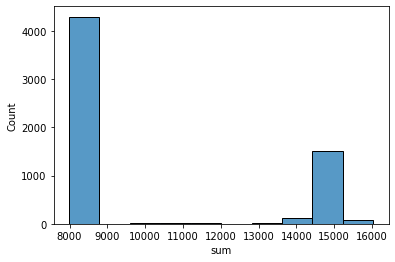

In [4]:
print(sns.histplot(va_17['sum'], bins= 10))

In [5]:
va_17.corr( method='pearson')

,lc0,lc1,lc2,lc3,timestamp,sum
lc0,1.000000,0.898210,0.909264,0.719814,-0.776703,0.978473
lc1,0.898210,1.000000,0.866022,0.486141,-0.695311,0.930053
lc2,0.909264,0.866022,1.000000,0.818268,-0.763646,0.966803
lc3,0.719814,0.486141,0.818268,1.000000,-0.666179,0.760978
timestamp,-0.776703,-0.695311,-0.763646,-0.666179,1.000000,-0.788728
sum,0.978473,0.930053,0.966803,0.760978,-0.788728,1.000000


<AxesSubplot:xlabel='timestamp', ylabel='sum'>

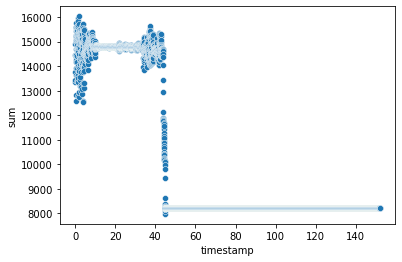

In [9]:
sns.scatterplot(x='timestamp', y='sum', data= va_17)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
A

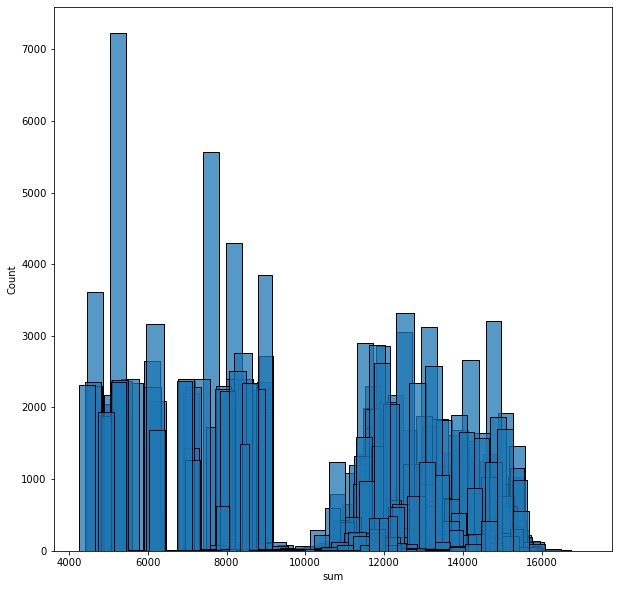

In [974]:
#Checking the distribution of all Datasets in a single graph

import glob
files = glob.glob (r'C:\Users\pranoy.swain\OneDrive - TIGER ANALYTICS INDIA CONSULTING PRIVATE LIMITED\Desktop\CASE STUDY PIP\Raw_data (2)\Raw_data\VA00000000000017/*.csv')

plt.figure(figsize=(10,10))
for file in files:
    csv = pd.read_csv(file)
    print(sns.histplot(csv['sum'] ,bins=20))


# Data Preparation

In [12]:
path = r"C:\Users\pranoy.swain\OneDrive - TIGER ANALYTICS INDIA CONSULTING PRIVATE LIMITED\Desktop\CASE STUDY PIP\Raw_data (2)\Raw_data"

#Reading all jason file in a single dataframe 

json_df = pd.DataFrame()
for folder in os.listdir(path):
    all_folders = ''.join((path,'/',folder))
    for file in os.listdir(all_folders):                
        if file.endswith('.json'):
            with open(os.path.join(all_folders,file)) as json_file:
                json_df_1=pd.read_json(json_file,orient='index').transpose()
                json_df = pd.concat([json_df,json_df_1],ignore_index=True)

In [33]:
json_df

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05T10:56:11-05:00,"[urination, cat in box]",None,Ryan,6589,None
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18T14:41:37-05:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,None
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03T15:43:43-05:00,"[cat in box, urination]",None,Ryan,5139,None
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01T12:02:05-05:00,"[non_elimination, cat in box]",None,Ryan,6983,None
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08T06:47:11-05:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,None
...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24T01:36:18-05:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]"
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26T06:29:01-05:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]"
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27T03:47:55-05:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]"
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02T01:15:57-05:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]"


In [14]:
json_df.columns

Index(['Device_ID', 'Event_ID', 'Event_start_time', 'Tags', 'Free_text',
       'Name_of_cat', 'Weight_of_cat', 'Tare_weight'],
      dtype='object')

In [19]:
import os
from glob import glob
PATH = r"C:\Users\pranoy.swain\OneDrive - TIGER ANALYTICS INDIA CONSULTING PRIVATE LIMITED\Desktop\CASE STUDY PIP\Raw_data (2)\Raw_data"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

In [20]:
timestamp_1 = []
timestamp_std_1 = []
mean_1 = []
sum_std_1= []
timestamp_2 =[]
timestamp_std_2 = []
mean_2 = [] 
sum_std_2 = []

for file in all_csv_files:
    csv = pd.read_csv(file)
    timestamp_1.append(csv['timestamp'][csv['sum']>=csv['sum'].mean()].mean())
    timestamp_std_1.append(csv['timestamp'][csv['sum']>=csv['sum'].mean()].std())
    mean_1.append(csv['sum'][csv['sum']>=csv['sum'].mean()].mean())
    sum_std_1.append(csv['sum'][csv['sum']>=csv['sum'].mean()].std())
    timestamp_2.append(csv['timestamp'][csv['sum']<csv['sum'].mean()].mean())
    timestamp_std_2.append(csv['timestamp'][csv['sum']<csv['sum'].mean()].std())
    mean_2.append(csv['sum'][csv['sum']<csv['sum'].mean()].mean())
    sum_std_2.append(csv['sum'][csv['sum']<csv['sum'].mean()].std())

In [21]:
range_timestamp_1=[]

for file in all_csv_files:
    csv = pd.read_csv(file)
    range_timestamp_1.append(csv['timestamp'][csv['sum']>=csv['sum'].mean()].max()-csv['timestamp'][csv['sum']>=csv['sum'].mean()].min())

In [22]:
range_1_timestamp = pd.DataFrame(range_timestamp_1)
range_1_timestamp.columns = ['range_timestamp_1']

In [23]:
range_timestamp_2=[]

for file in all_csv_files:
    csv = pd.read_csv(file)
    range_timestamp_2.append(csv['timestamp'][csv['sum']<csv['sum'].mean()].max()-csv['timestamp'][csv['sum']<csv['sum'].mean()].min())

range_2_timestamp = pd.DataFrame(range_timestamp_2)
range_2_timestamp.columns = ['range_timestamp_2']

In [24]:
w_median_1 = []
mad_1=[]
w_median_2 = []
mad_2 =[]


for file in all_csv_files:
    csv = pd.read_csv(file)
    w_median_1.append(weighted.median(csv['sum'][csv['sum']>=csv['sum'].mean()],csv['timestamp'][csv['sum']>=csv['sum'].mean()]))
    mad_1.append(csv['sum'][csv['sum']>=csv['sum'].mean()].mad())
    w_median_2.append(weighted.median(csv['sum'][csv['sum']<csv['sum'].mean()],csv['timestamp'][csv['sum']<csv['sum'].mean()]))
    mad_2.append(csv['sum'][csv['sum']<csv['sum'].mean()].mad())

In [40]:
df_1 = pd.concat([pd.DataFrame(range_1_timestamp),pd.DataFrame(timestamp_std_1), pd.DataFrame(w_median_1),pd.DataFrame(mad_1) ,pd.DataFrame(mean_1),pd.DataFrame(sum_std_1),pd.DataFrame(range_timestamp_2),pd.DataFrame(timestamp_std_2), pd.DataFrame(w_median_2),pd.DataFrame(mad_2), pd.DataFrame(mean_2) ,pd.DataFrame(sum_std_2)], axis= 1 )
df_1.columns= ['range_1_timestamp' , 'timestamp_std_1','w_median_1','mad_1', 'mean_1' , 'sum_std_1' , 'range_timestamp_2' , 'timestamp_std_2','w_median_2', 'mad_2', 'mean_2' , 'sum_std_2']

In [25]:
momentum=[]

for file in all_csv_files:
    csv = pd.read_csv(file)
    momentum.append(csv['sum'].median()*csv['timestamp'].max())

momentum = pd.DataFrame(momentum)
momentum.columns = ['momentum']

In [41]:
df_1

,range_1_timestamp,timestamp_std_1,w_median_1,mad_1,mean_1,sum_std_1,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2
0,44.549942,12.871299,14783.078909,262.879887,14683.978127,565.412482,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210
1,52.675000,15.209673,13729.000000,170.918421,13702.134789,398.282317,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128
2,44.125012,12.748615,13988.197964,337.290133,13970.327860,521.328658,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950
3,11.574934,3.352232,15340.000000,1097.159520,14848.512931,1525.083157,54.775006,15.823004,8793.0,8.509305,8798.611770,56.800831
4,48.775000,14.090955,11773.000000,150.975314,11709.722336,235.912631,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251
...,...,...,...,...,...,...,...,...,...,...,...,...
13070,48.508258,14.031371,11194.000000,229.151460,11105.440871,295.376202,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924
13071,18.240629,5.275410,12180.000000,944.072545,11595.550409,1137.477829,132.144766,41.018160,7755.0,6.376389,7758.357361,10.877748
13072,77.271593,22.316346,12015.000000,78.614304,12012.479704,124.618100,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886
13073,194.292593,55.637286,10718.000000,67.219508,10729.069172,110.663980,205.031823,65.526324,6336.0,1882.670767,7963.687933,1945.839136


In [26]:
highest_lc0=[]
highest_lc1=[]
highest_lc2=[]
highest_lc3=[]
lowest_lc0 = []
lowest_lc1 = []
lowest_lc2 = []
lowest_lc3 = []

for file in all_csv_files:
    csv = pd.read_csv(file)
    highest_lc0.append(csv['lc0'].max())
    highest_lc1.append(csv['lc1'].max())
    highest_lc2.append(csv['lc2'].max())
    highest_lc3.append(csv['lc3'].max())
    lowest_lc0.append(csv['lc0'].min())
    lowest_lc1.append(csv['lc1'].min())
    lowest_lc2.append(csv['lc2'].min())
    lowest_lc3.append(csv['lc3'].min())

In [28]:
#Durbin_watson Auto correlation coefficient for 'sum' column

auto_corr=[]

for file in all_csv_files:
    csv = pd.read_csv(file)
    auto_corr.append(durbin_watson(csv['sum']))

auto_corr = pd.DataFrame(auto_corr)
auto_corr.columns = ['auto_corr']

In [46]:
Event_ID=[]

for file in all_csv_files:
    Event_ID.append((file.split('\\')[-1]).split('.')[0])


In [36]:
new = pd.concat([pd.DataFrame(Event_ID),pd.DataFrame(highest_lc0),pd.DataFrame(highest_lc1),pd.DataFrame(highest_lc2),pd.DataFrame(highest_lc3),pd.DataFrame(lowest_lc0),pd.DataFrame(lowest_lc1),pd.DataFrame(lowest_lc2),pd.DataFrame(lowest_lc3)], axis=1) 

In [37]:
new.columns=['Event_ID','highest_lc0','highest_lc1','highest_lc2','highest_lc3','lowest_lc0','lowest_lc1','lowest_lc2','lowest_lc3']

In [47]:
new

,Event_ID,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc1,lowest_lc2,lowest_lc3
0,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,6032,6658,6208,1817,2846,1893,4410,-1774
1,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,7949,4983,9430,-2067,2981,1481,3589,-2526
2,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,4136,6993,6507,3740,1416,2776,2953,327
3,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,3618,4141,5868,6284,2610,2481,2885,546
4,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,4452,5248,5942,2878,1308,1876,1901,-442
...,...,...,...,...,...,...,...,...,...
13070,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,6224,2958,4208,3763,1787,671,1340,1123
13071,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,3649,2383,7449,2142,3052,148,2039,1469
13072,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,6479,4565,3946,3961,4201,-72,1088,1144
13073,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,5783,2458,4474,5860,2982,-1311,1399,1712


In [ ]:
type(Event_ID)

In [48]:
df_csv= pd.concat([ new, df_1, auto_corr, momentum ], axis=1)

In [49]:
df_csv.head()

,Event_ID,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc1,lowest_lc2,lowest_lc3,range_1_timestamp,...,mean_1,sum_std_1,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum
0,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,6032,6658,6208,1817,2846,1893,4410,-1774,44.549942,...,14683.978127,565.412482,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06
1,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,7949,4983,9430,-2067,2981,1481,3589,-2526,52.675000,...,13702.134789,398.282317,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05
2,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,4136,6993,6507,3740,1416,2776,2953,327,44.125012,...,13970.327860,521.328658,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05
3,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,3618,4141,5868,6284,2610,2481,2885,546,11.574934,...,14848.512931,1525.083157,54.775006,15.823004,8793.0,8.509305,8798.611770,56.800831,0.000015,5.837676e+05
4,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,4452,5248,5942,2878,1308,1876,1901,-442,48.775000,...,11709.722336,235.912631,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05


In [50]:
#Merging csv dataframe and json dataframe using Event ID as the key

df_first = pd.merge(json_df, df_csv, how = 'inner', on='Event_ID')
df_first

,Device_ID,Event_ID,Event_start_time,Tags,Free_text,Name_of_cat,Weight_of_cat,Tare_weight,highest_lc0,highest_lc1,...,mean_1,sum_std_1,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum
0,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0OWQ4M2I3MS1kNDZmLTRiYj...,2020-09-05T10:56:11-05:00,"[urination, cat in box]",None,Ryan,6589,None,6032,6658,...,14683.978127,565.412482,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06
1,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0YmI3ZDc5YS0wNzMwLTQ0MT...,2020-07-18T14:41:37-05:00,"[cat in box, synapse_labeled, urination]","14:42:15\t14:43:09\tConfirmed activity, cat in...",Ryan,6935,None,7949,4983,...,13702.134789,398.282317,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05
2,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo0ZTBhMDVhOC0wZmI2LTQ2MG...,2020-09-03T15:43:43-05:00,"[cat in box, urination]",None,Ryan,5139,None,4136,6993,...,13970.327860,521.328658,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05
3,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1NGEwMTg2My01NDhjLTRhYT...,2020-09-01T12:02:05-05:00,"[non_elimination, cat in box]",None,Ryan,6983,None,3618,4141,...,14848.512931,1525.083157,54.775006,15.823004,8793.0,8.509305,8798.611770,56.800831,0.000015,5.837676e+05
4,VA00000000000017,RXZlbnRJbmZvcm1hdGlvbjo1YzQwMzE4MS1lNzhkLTQ3Nz...,2020-08-08T06:47:11-05:00,"[cat in box, synapse_labeled, urination]","6:47:16\t6:48:59\tConfirmed activity, cat in t...",Ryan,7017,None,4452,5248,...,11709.722336,235.912631,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjplOTY1YzllOC01YWU1LTRmYj...,2021-08-24T01:36:18-05:00,"[urination, cat in box]","1:36:18\t1:37:07\tConfirmed activity, cat in t...",Sparkler,4116,"[2340, 868, 2150, 1626]",6224,2958,...,11105.440871,295.376202,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924,0.000132,6.582192e+05
13071,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmNDMxM2YwNi1hNzk0LTQxMG...,2021-04-26T06:29:01-05:00,"[cat in box, non_elimination]",None,Sparkler,4604,"[3577, 400, 2043, 1747]",3649,2383,...,11595.550409,1137.477829,132.144766,41.018160,7755.0,6.376389,7758.357361,10.877748,0.000029,1.025311e+06
13072,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYjQ3YzJkZi03ODY3LTQ3Zm...,2021-04-27T03:47:55-05:00,"[urination, cat in box]",None,Sparkler,4416,"[4313, -14729, 1754, 1697]",6479,4565,...,12012.479704,124.618100,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886,0.000039,1.639793e+06
13073,VB00000000000192,RXZlbnRJbmZvcm1hdGlvbjpmYTY2MzA0OC1kNjQ1LTQ5OD...,2021-09-02T01:15:57-05:00,"[cat in box, defecation]","1:15:53\t1:19:07\tConfirmed activity, cat in t...",Sparkler,4386,"[3702, -893, 1561, 1940]",5783,2458,...,10729.069172,110.663980,205.031823,65.526324,6336.0,1882.670767,7963.687933,1945.839136,0.000084,2.200666e+06


In [52]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13075 entries, 0 to 13074
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device_ID          13075 non-null  object 
 1   Event_ID           13075 non-null  object 
 2   Event_start_time   13075 non-null  object 
 3   Tags               13075 non-null  object 
 4   Free_text          10648 non-null  object 
 5   Name_of_cat        12829 non-null  object 
 6   Weight_of_cat      13075 non-null  object 
 7   Tare_weight        12063 non-null  object 
 8   highest_lc0        13075 non-null  int64  
 9   highest_lc1        13075 non-null  int64  
 10  highest_lc2        13075 non-null  int64  
 11  highest_lc3        13075 non-null  int64  
 12  lowest_lc0         13075 non-null  int64  
 13  lowest_lc1         13075 non-null  int64  
 14  lowest_lc2         13075 non-null  int64  
 15  lowest_lc3         13075 non-null  int64  
 16  range_1_timestamp  130

In [53]:
df_case = df_first.copy()

In [54]:
#change the data type to integer

df_case['Weight_of_cat']=df_case['Weight_of_cat'].astype('float')

In [65]:
# checking null values

df_case.isnull().sum()

Device_ID               0
Event_ID                0
Event_start_time        0
Tags                    0
Free_text            2427
Name_of_cat           246
Weight_of_cat           0
Tare_weight          1012
highest_lc0             0
highest_lc1             0
highest_lc2             0
highest_lc3             0
lowest_lc0              0
lowest_lc1              0
lowest_lc2              0
lowest_lc3              0
range_1_timestamp       0
timestamp_std_1         0
w_median_1              0
mad_1                   0
mean_1                  0
sum_std_1               0
range_timestamp_2       0
timestamp_std_2         0
w_median_2              0
mad_2                   0
mean_2                  0
sum_std_2               0
auto_corr               0
momentum                0
dtype: int64

In [57]:
# No null values in our required columns of dataframe
# Free_text,Name_of_cat,Tare_weight columns are of no use, so action taken to remove null

In [64]:
len(df_case)

13075

In [66]:
#Creating target variables
#elimination or non_elemination

def target_variable_1(catagory):
    if ('urination' in catagory) or ('defecation' in catagory) or ('elemination' in catagory):
        return 'elimination'
    else:
        return 'non_elimination'

df_case['tv_1'] = df_case['Tags'].map(target_variable_1)

In [69]:
#Creating target variables
#Elimination type(Urination or defectaion)

def target_variable_2(catagory):
    if 'urination' in catagory:
        return 'urination'
    if 'defecation' in catagory:
        return 'defecation'
    else:
        return 'non_elimination'
    
df_case['tv_2'] = df_case['Tags'].map(target_variable_2)

In [73]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13075 entries, 0 to 13074
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Device_ID          13075 non-null  object 
 1   Event_ID           13075 non-null  object 
 2   Event_start_time   13075 non-null  object 
 3   Tags               13075 non-null  object 
 4   Free_text          10648 non-null  object 
 5   Name_of_cat        12829 non-null  object 
 6   Weight_of_cat      13075 non-null  float64
 7   Tare_weight        12063 non-null  object 
 8   highest_lc0        13075 non-null  int64  
 9   highest_lc1        13075 non-null  int64  
 10  highest_lc2        13075 non-null  int64  
 11  highest_lc3        13075 non-null  int64  
 12  lowest_lc0         13075 non-null  int64  
 13  lowest_lc1         13075 non-null  int64  
 14  lowest_lc2         13075 non-null  int64  
 15  lowest_lc3         13075 non-null  int64  
 16  range_1_timestamp  130

## Outlier Analysis and Treatment

In [135]:
#Box Plot
def box_plot(data,q=1.75):
    fields=list(data.select_dtypes([np.number]).columns)
    max_l = len(max(list(data.columns),key = len))+1
    plt.figure(figsize=(25,40))
    i=0
    for field in fields:
        plt.subplot(8,3,i+1)
        i+=1
        sns.boxplot(x = data[field])
        IQR = data[field].quantile(0.75)-data[field].quantile(0.25)
        lower_boundary = data[field].quantile(0.25)-q*IQR
        upper_boundary = data[field].quantile(0.75)+q*IQR
        outlier_percentage = (data[(data[field]<lower_boundary) | (data[field]>upper_boundary)][field].count()/data[field].count())*100
        print(field.ljust(max_l,' ')+':'+'('+str(int(lower_boundary))+' , '+str(int(upper_boundary))+')'+':'+str(outlier_percentage)+'%')
        plt.axvline(lower_boundary,color='red',ls='--', lw=2.6)
        plt.axvline(upper_boundary,color='green',ls='--', lw=2.6)

In [78]:
#outlier percentage calculation for each numerical column

def outlier_percentage(data,q=1.75):
    fields=list(data.select_dtypes([np.number]).columns)
    max_l = len(max(list(data.columns),key = len))+1
    i=0
    for field in fields:
        i+=1
        IQR = data[field].quantile(0.75)-data[field].quantile(0.25)
        lower_boundary = data[field].quantile(0.25)-q*IQR
        upper_boundary = data[field].quantile(0.75)+q*IQR
        outlier_percentage = (data[(data[field]<lower_boundary) | (data[field]>upper_boundary)][field].count()/data[field].count())*100
        print(field.ljust(max_l,' ')+':'+str(math.ceil(outlier_percentage))+'%')

Weight_of_cat     :(1861 , 7815):0.97131931166348%
highest_lc0       :(-1618 , 11369):0.5124282982791587%
highest_lc1       :(-1009 , 10632):0.4894837476099426%
highest_lc2       :(-1829 , 12109):0.25239005736137665%
highest_lc3       :(-984 , 11415):1.537284894837476%
lowest_lc0        :(-3758 , 7826):0.35946462715105165%
lowest_lc1        :(-2822 , 6497):0.16061185468451242%
lowest_lc2        :(-3385 , 7747):0.5353728489483747%
lowest_lc3        :(-2897 , 7097):1.2925430210325046%
range_1_timestamp :(-65 , 182):3.1510516252390057%
timestamp_std_1   :(-18 , 52):3.204588910133843%
w_median_1        :(3576 , 23522):0.6653919694072657%
mad_1             :(-198 , 523):12.451242829827915%
mean_1            :(3624 , 23394):0.6806883365200765%
sum_std_1         :(-424 , 1059):6.638623326959847%
range_timestamp_2 :(-27 , 198):4.826003824091778%
timestamp_std_2   :(6 , 34):23.31166347992352%
w_median_2        :(41 , 17735):0.9636711281070746%
mad_2             :(-595 , 969):9.108986615678777%


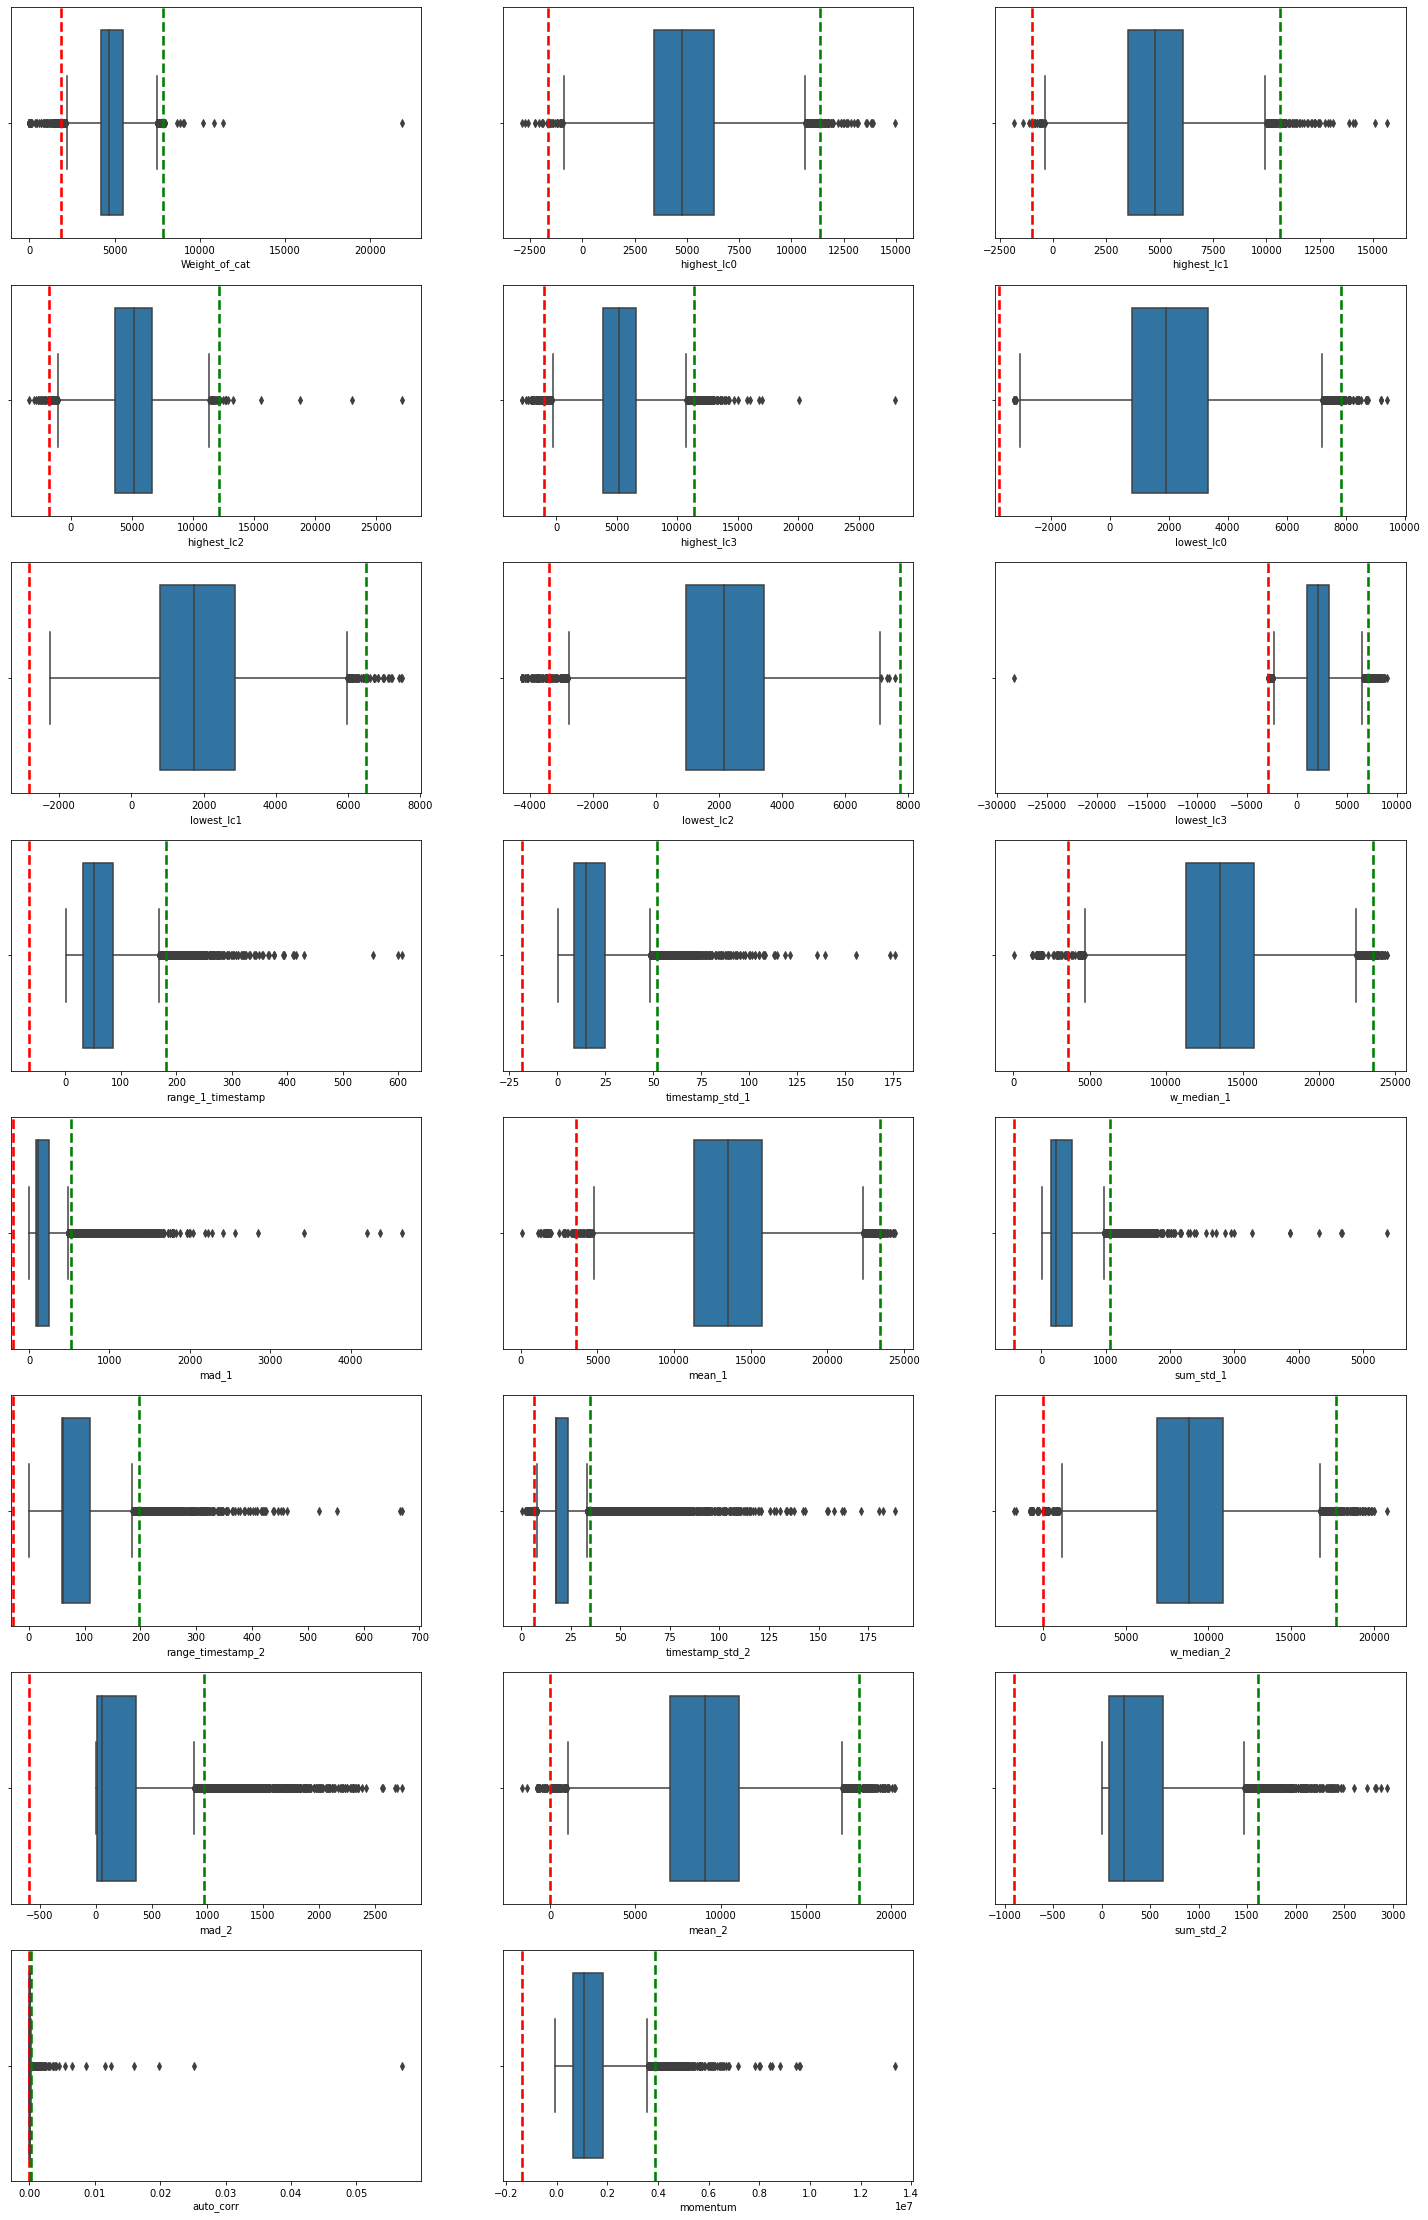

In [77]:
box_plot(df_case)

In [ ]:
# Above boxplot is showing many outliers in the data.

In [ ]:
# final model dataframe

df_case.drop(columns=['Device_ID','Event_ID','Event_start_time','Tags','Free_text','Tare_weight'],inplace=True)

In [91]:
df_case.drop(columns=['Name_of_cat'],inplace=True)

In [136]:
df_copy2= df_case.copy()

In [137]:
# Replacing outliers with the upper limit and lower limit

for col in df_case.select_dtypes(exclude=[object]).columns:
    IQR = df_case[col].quantile(0.75)-df_case[col].quantile(0.25)
    lower_boundary = df_case[col].quantile(0.25)-1.75*IQR
    upper_boundary = df_case[col].quantile(0.75)+1.75*IQR
    df_case[col] = np.where(df_case[col]> upper_boundary, upper_boundary,
                       np.where(df_case[col]< lower_boundary, lower_boundary,
                          df_case[col]))
        



In [138]:
outlier_percentage(df_case,q=1.75)

Weight_of_cat     :0%
highest_lc0       :0%
highest_lc1       :0%
highest_lc2       :0%
highest_lc3       :0%
lowest_lc0        :0%
lowest_lc1        :0%
lowest_lc2        :0%
lowest_lc3        :0%
range_1_timestamp :0%
timestamp_std_1   :0%
w_median_1        :0%
mad_1             :0%
mean_1            :0%
sum_std_1         :0%
range_timestamp_2 :0%
timestamp_std_2   :0%
w_median_2        :0%
mad_2             :0%
mean_2            :0%
sum_std_2         :0%
auto_corr         :0%
momentum          :0%


In [ ]:
# All outliers has been removed which can be seen from above outlier_percentage table

# Exploratory Data Analysis

## Frequency Distribution

### Box Plot

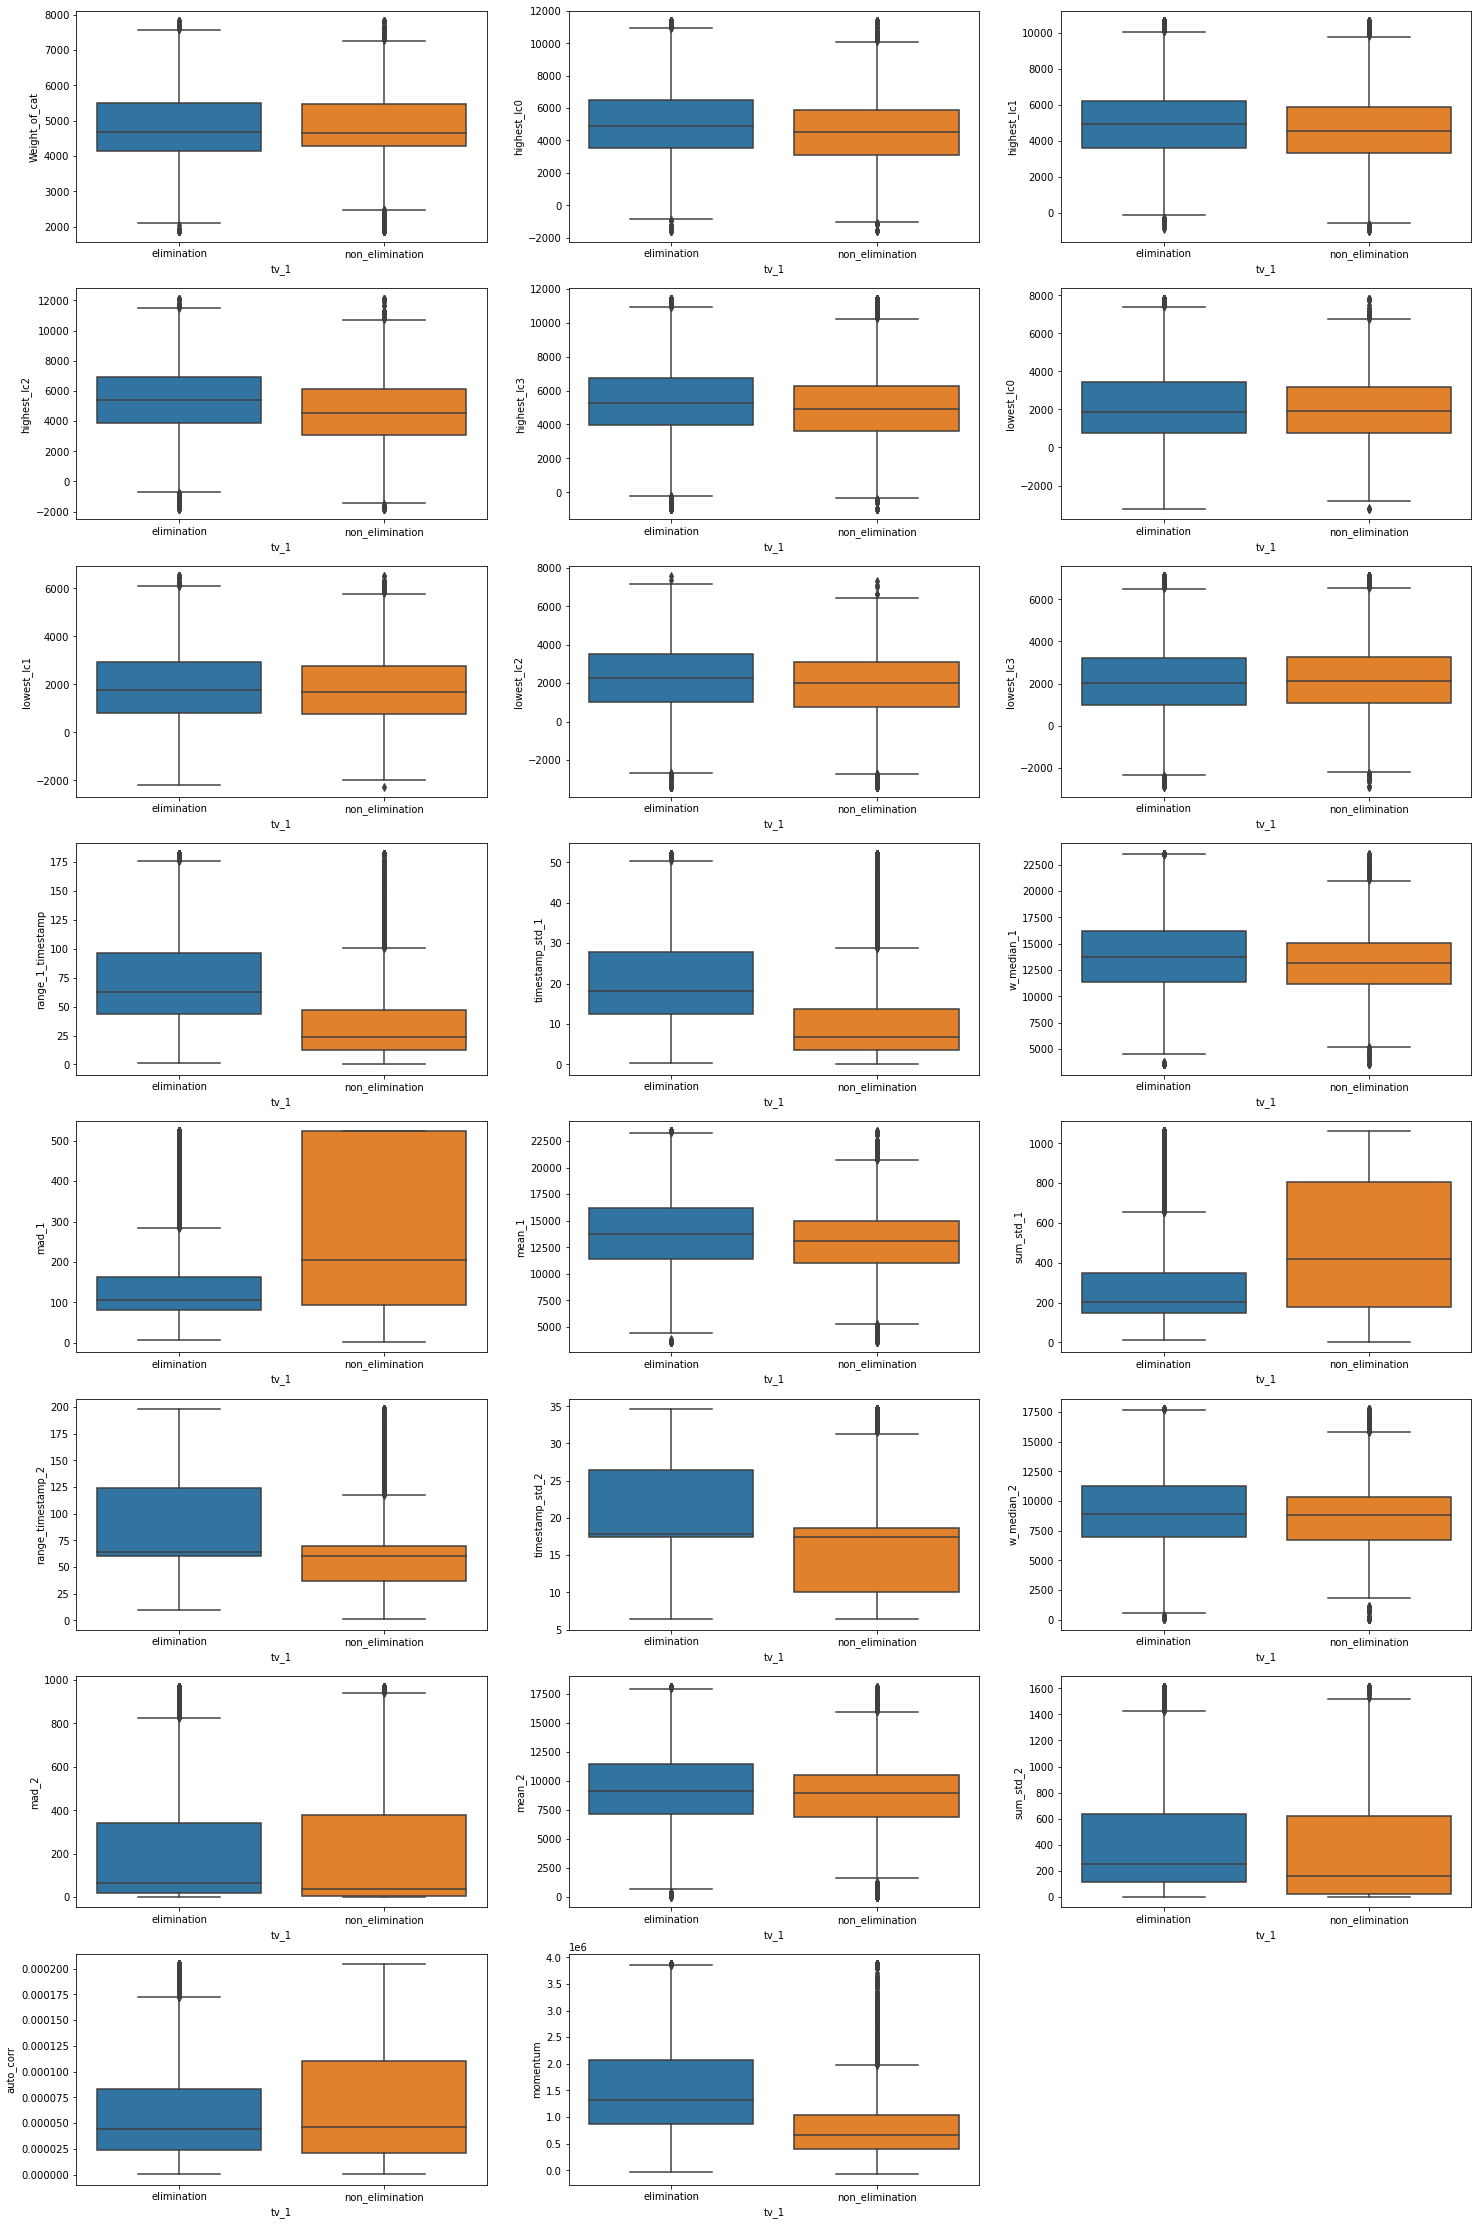

In [159]:
# For Target variables 1: elimination and non-elimination

plt.figure(figsize=(25,40))
i=0
for col in df_case.select_dtypes(exclude=[object]).columns:
    plt.subplot(8,3,i+1)
    i+=1
    sns.boxplot(data = df_case, x='tv_1', y=df_case[col])

In [161]:
# for very high auto_corr , mad_1, sum_std_1 values, chances for non_elimination are higher but we can be sure for lower values
# Higher the momentum and timestamp values, higher the chances for elimination and vice-versa

<AxesSubplot:xlabel='tv_1', ylabel='momentum'>

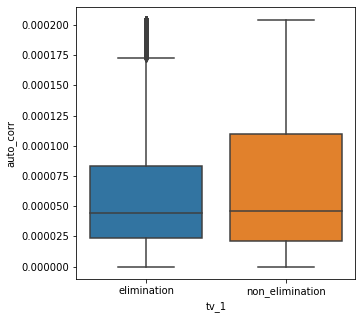

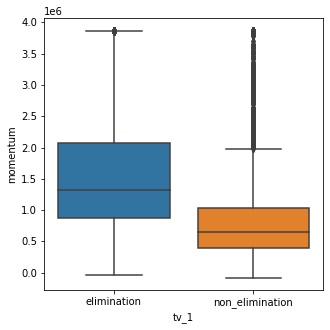

In [142]:
# For Target variables 1: elimination and non-elimination

plt.figure(figsize=(5,5))
sns.boxplot(data = df_case, x='tv_1', y='auto_corr')

plt.figure(figsize=(5,5))
sns.boxplot(data = df_case, x='tv_1', y='momentum')

In [149]:
# box plot for auto_corr is showing some difference 
# but from momentum boxplot, it can be inferred that higher the momentum higher the chances for elimination and vice-versa 

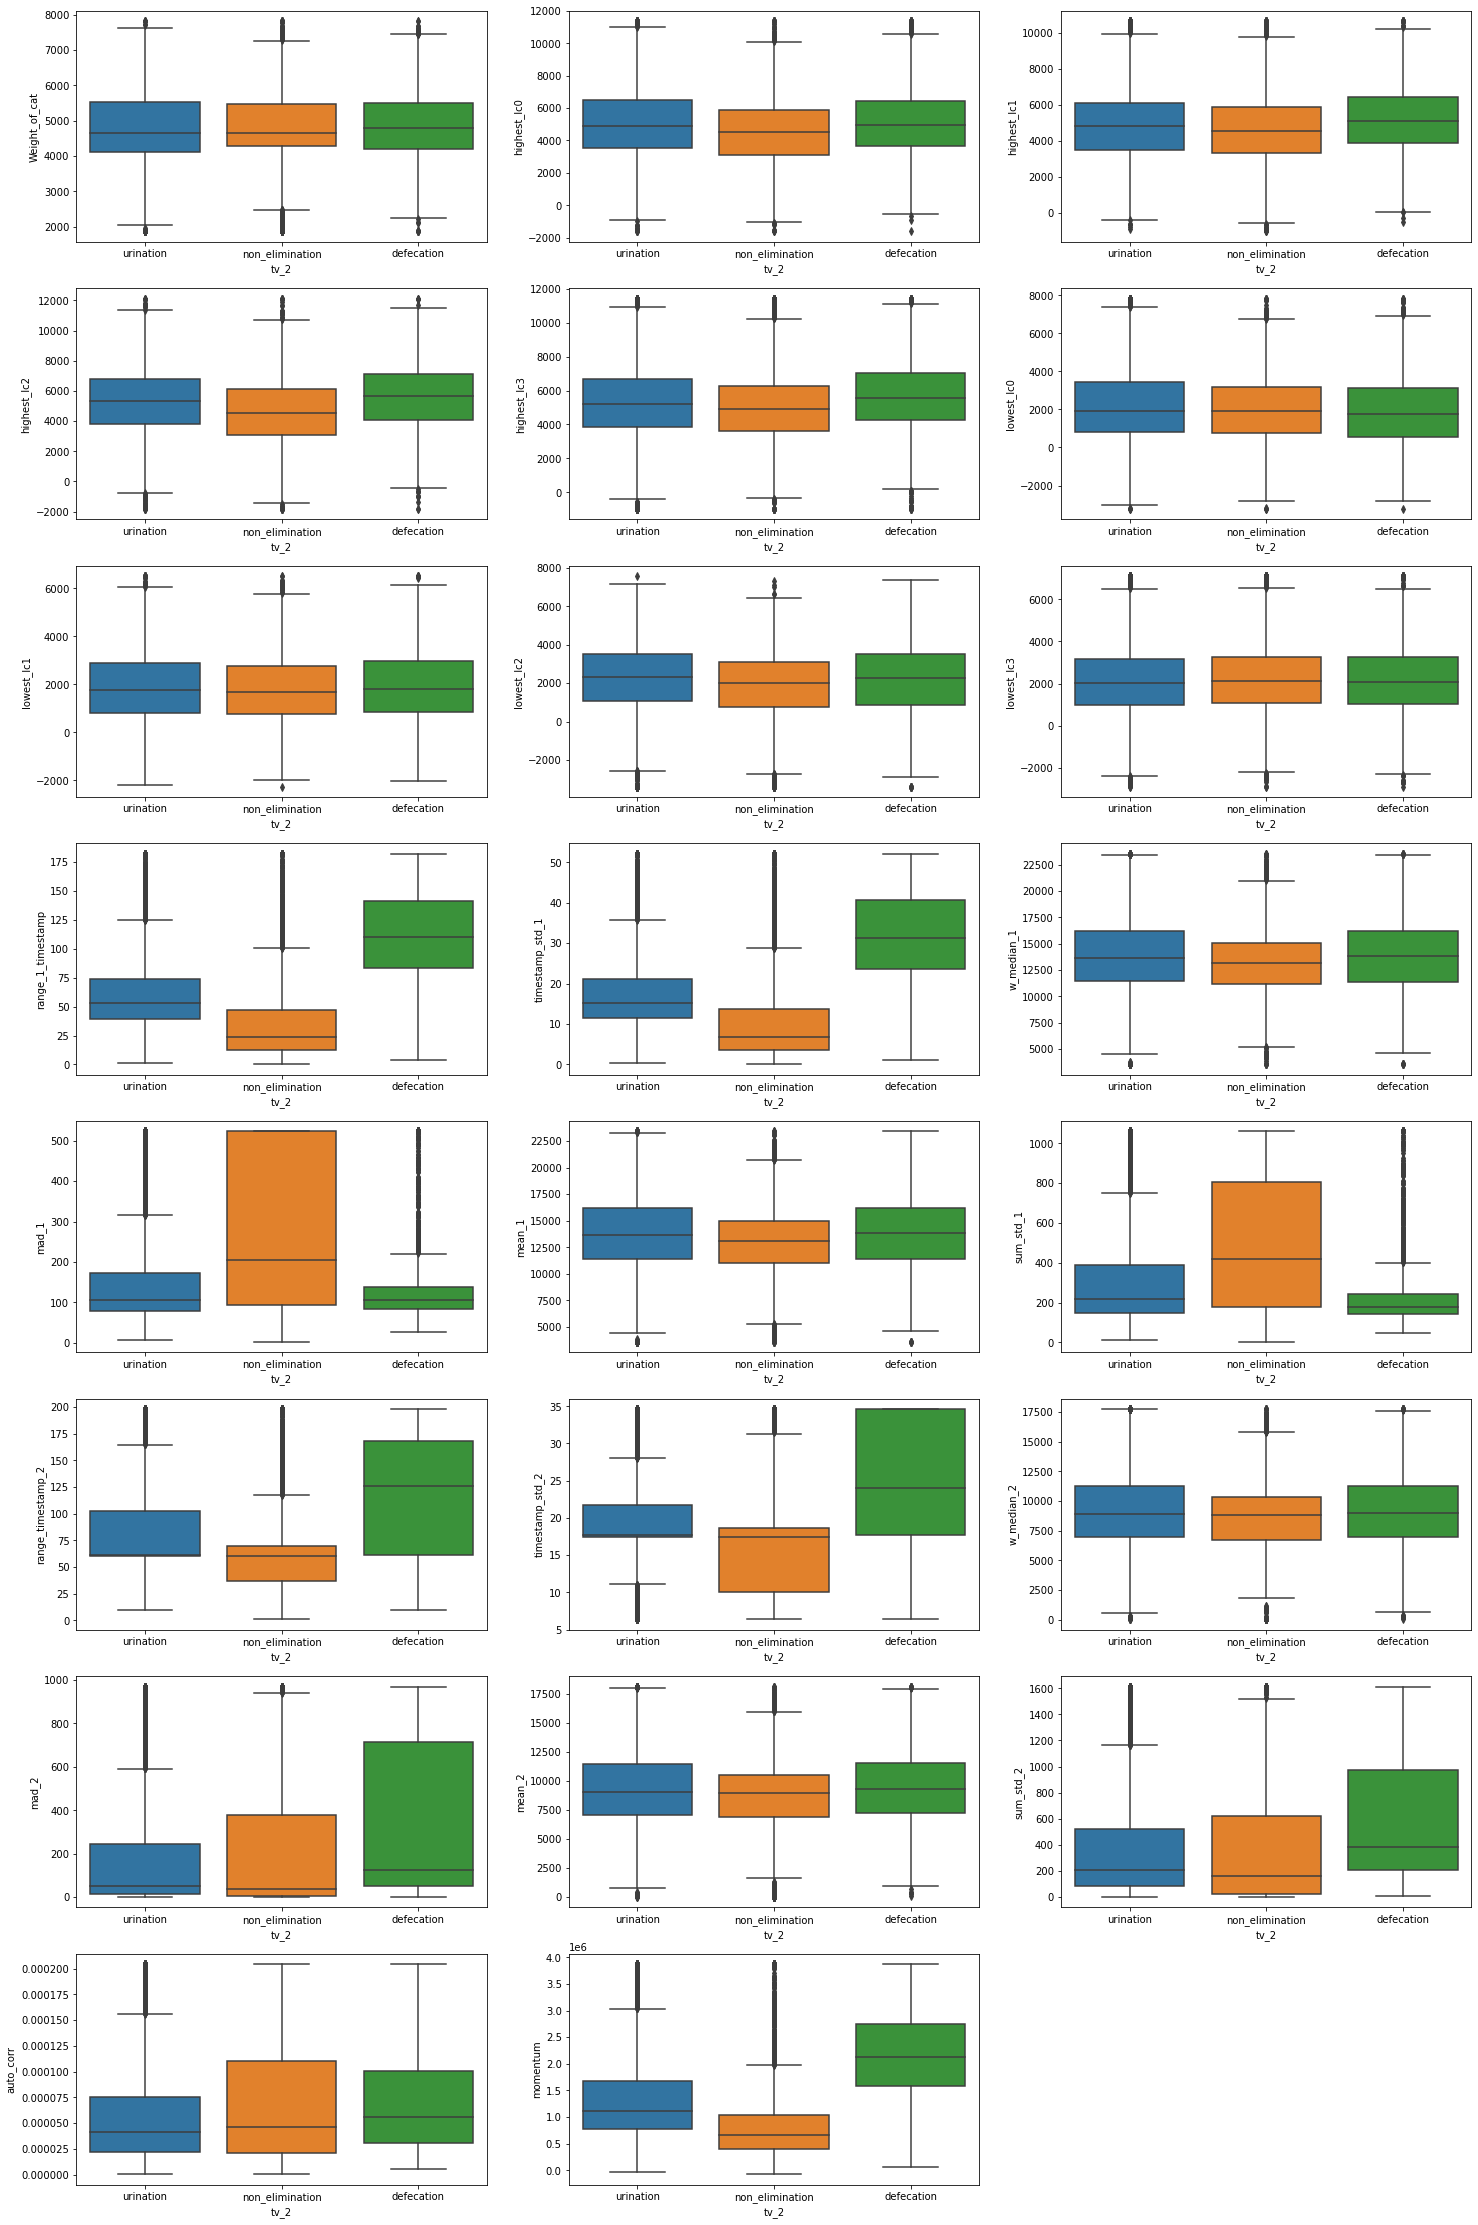

In [160]:
# For Target variables 2: urination and defecation

plt.figure(figsize=(25,40))
i=0
for col in df_case.select_dtypes(exclude=[object]).columns:
    plt.subplot(8,3,i+1)
    i+=1
    sns.boxplot(data = df_case, x='tv_2', y=df_case[col])

In [153]:
# For Target variables 2: urination and defecation

#box plot is showing some variation between defecation and urination for these following features:
#timestamp_std_1, timestamp_std_2, mad_1, mad_2, sum_std_2,sum_std_1,range_1_timestamp, range_timestamp_2, auto_corr, momentum

# inference:
# Higher the timestamp, higher the chances of defecation and vice-versa
# Higher the momentum, higher the chances of defecation and vice-versa
# for higher auto_corr values and mad_2, chances are higher for defecation but difficult to infer from lower value
# Higher the sum_std_2, higher chances for defecation
# Higher the sum_std_1, higher chances for urination


### Count plot

<AxesSubplot:xlabel='tv_1', ylabel='count'>

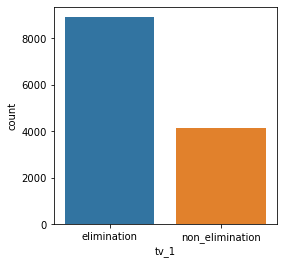

In [144]:
# for elimination and non-elimination

plt.figure(figsize=(4,4))
sns.countplot(data = df_case, x = 'tv_1')

### Hypothesis Test

In [223]:
#Bar plot shows elimanation activity is more than the non_elimination activity

# Confirming the above plot this by simple Chi-square hypothesis testing

# H0(Null hypothesis) : There is no significant difference in the propotion of elimination and non_elimination.
# Ha(alternate hypothesis) : There is significant difference in the propotion of elimination and non_elimination.

In [226]:
# Simple Chi-square Hypothesis Test for target Variable 1 for elimination and non_elimination

target_1 = df_case['tv_1'].value_counts()
stats.chisquare(target_1)

Power_divergenceResult(statistic=1745.294760994264, pvalue=0.0)

In [227]:
# As p-value < 0.05, Null Hypothesis is rejected.
# so alternate hypothesis is true that there is signification difference between elimination and non_elimination activity

<AxesSubplot:xlabel='tv_2', ylabel='count'>

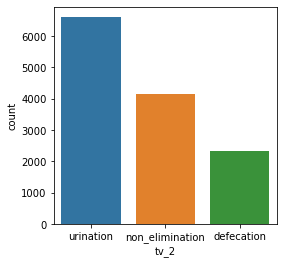

In [146]:
# Count plot for urination and defecation

plt.figure(figsize=(4,4))
sns.countplot(data = df_case, x = 'tv_2')

In [228]:
#Bar plot shows urination activity is more than the defecation

# Confirming the above plot this by hypothesis testing

# H0(Null hypothesis) : There is no significant difference in the propotion of urination and defecation.
# Ha(alternate hypothesis) : There is significant difference in the propotion of urination and defecation.

In [229]:
# Simple Chi-square Hypothesis Test for target Variable 2 for urination and defecation.

target_2 = df_case['tv_2'][df_case['tv_2']!= 'non_elimination'].value_counts()
stats.chisquare(target_2)

Power_divergenceResult(statistic=2065.6997535290166, pvalue=0.0)

In [230]:
# As p-value < 0.05, Null Hypothesis is rejected.
# so alternate hypothesis is true that there is signification difference between urination and defecation.

### violin plot

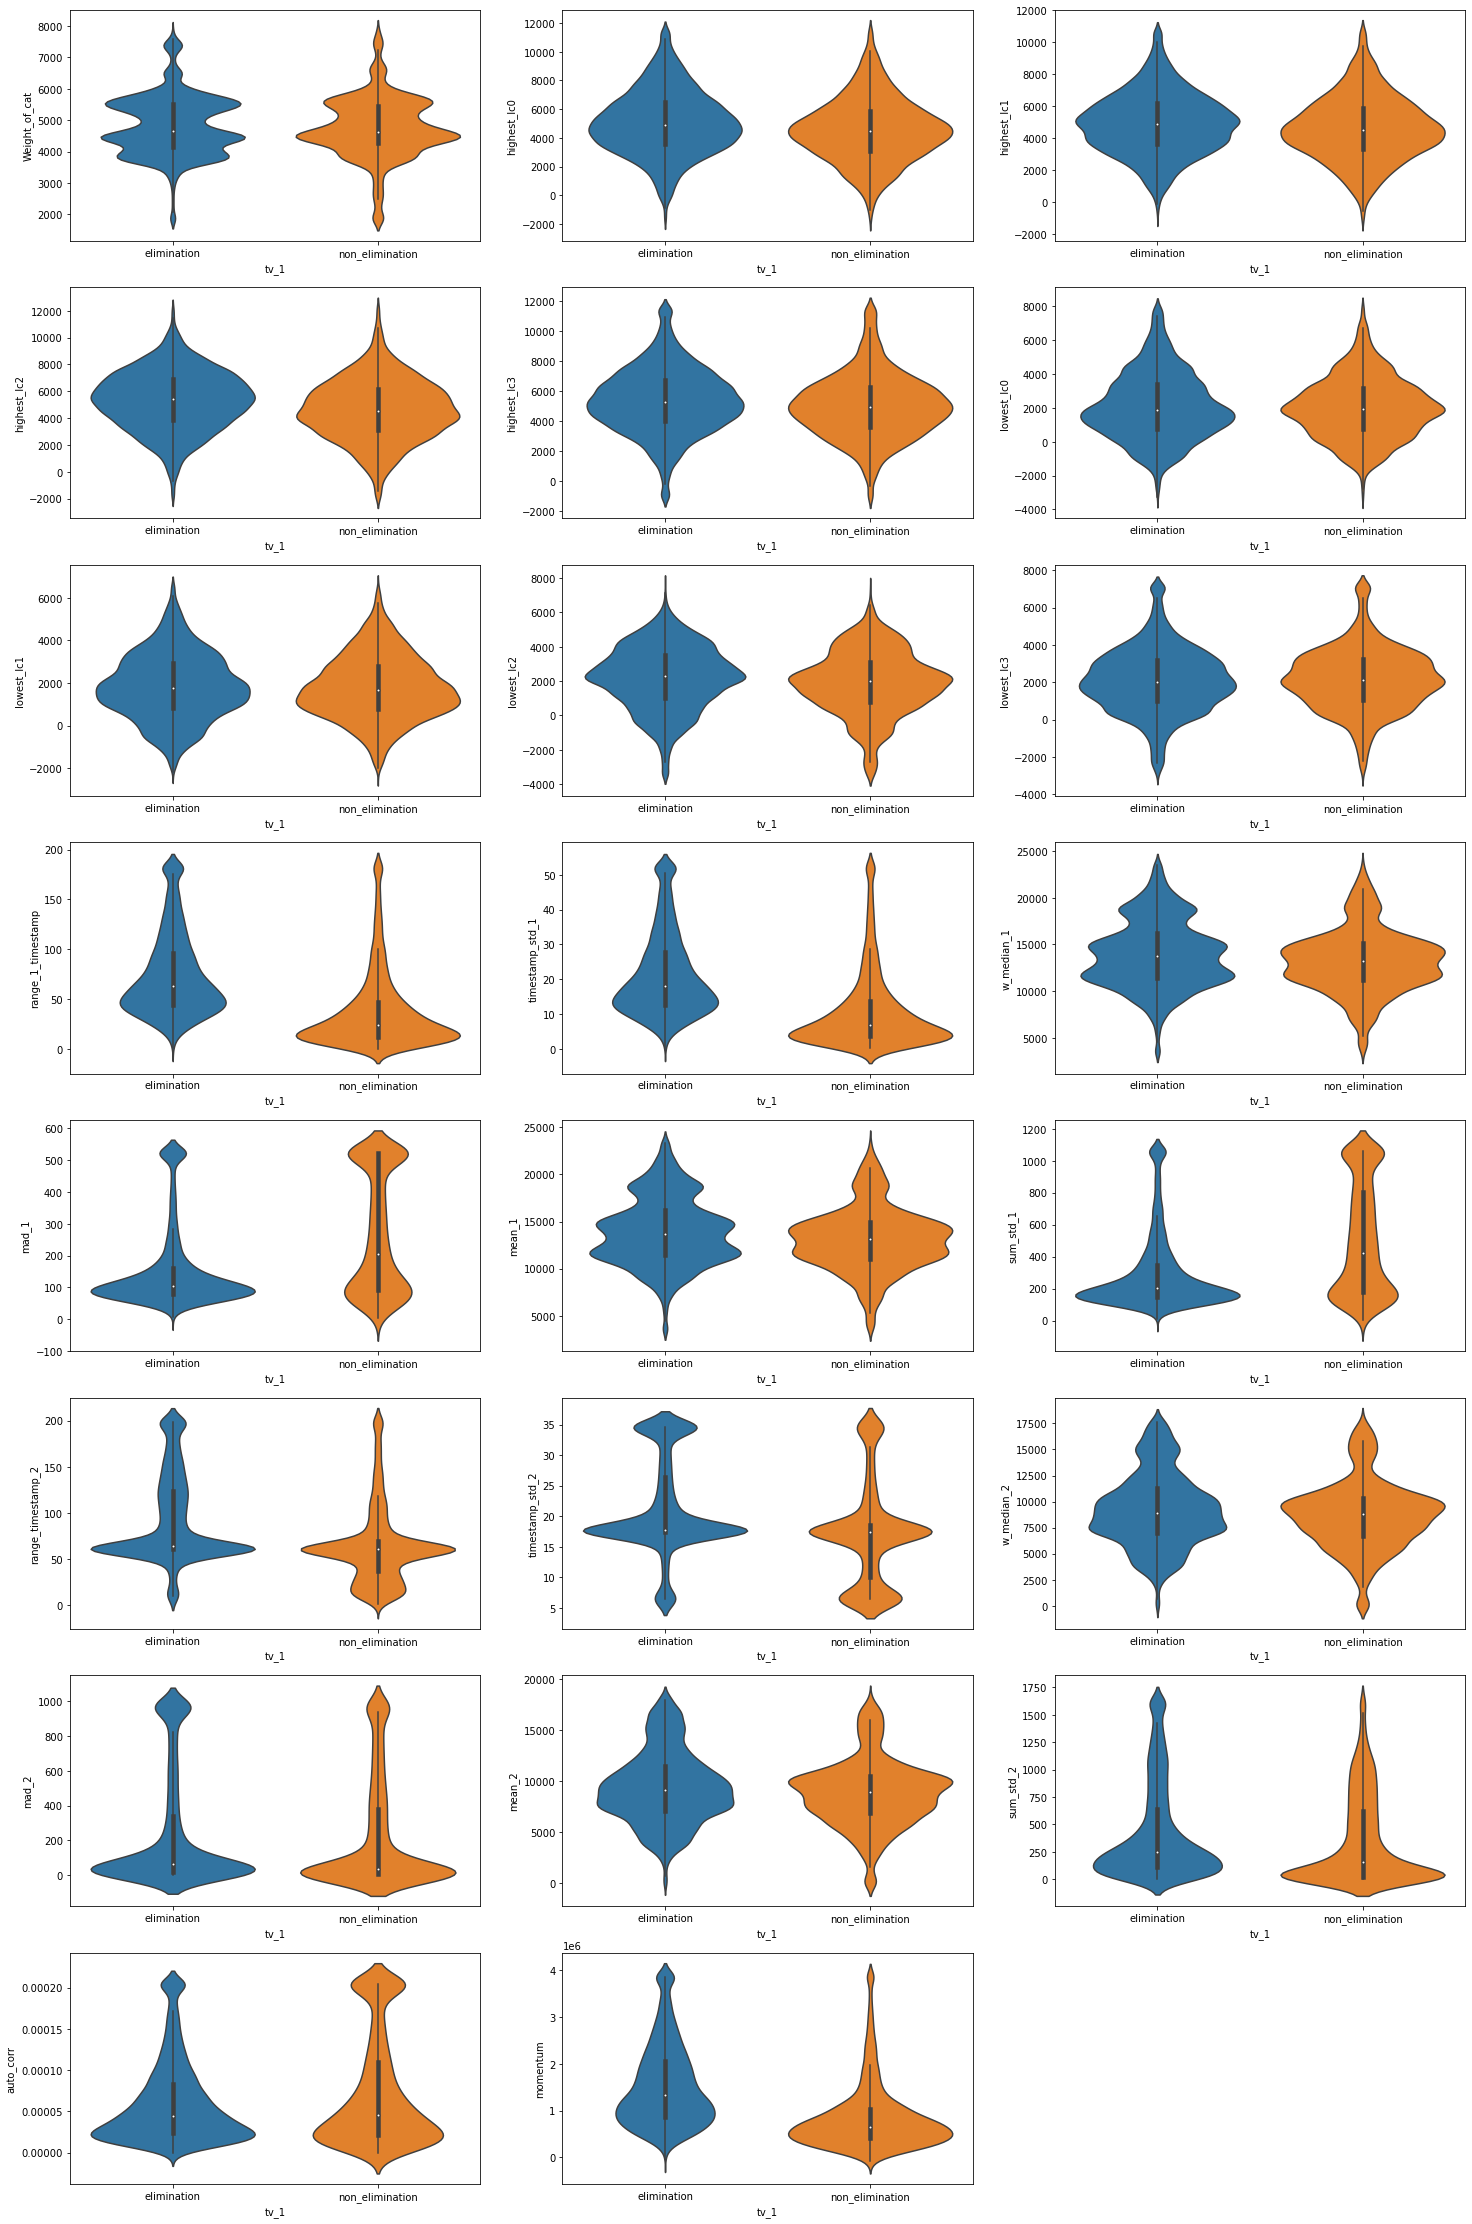

In [162]:
# For Target variables 1: elimination and non-elimination

plt.figure(figsize=(25,40))
i=0
for col in df_case.select_dtypes(exclude=[object]).columns:
    plt.subplot(8,3,i+1)
    i+=1
    sns.violinplot(data = df_case, x='tv_1', y=df_case[col])

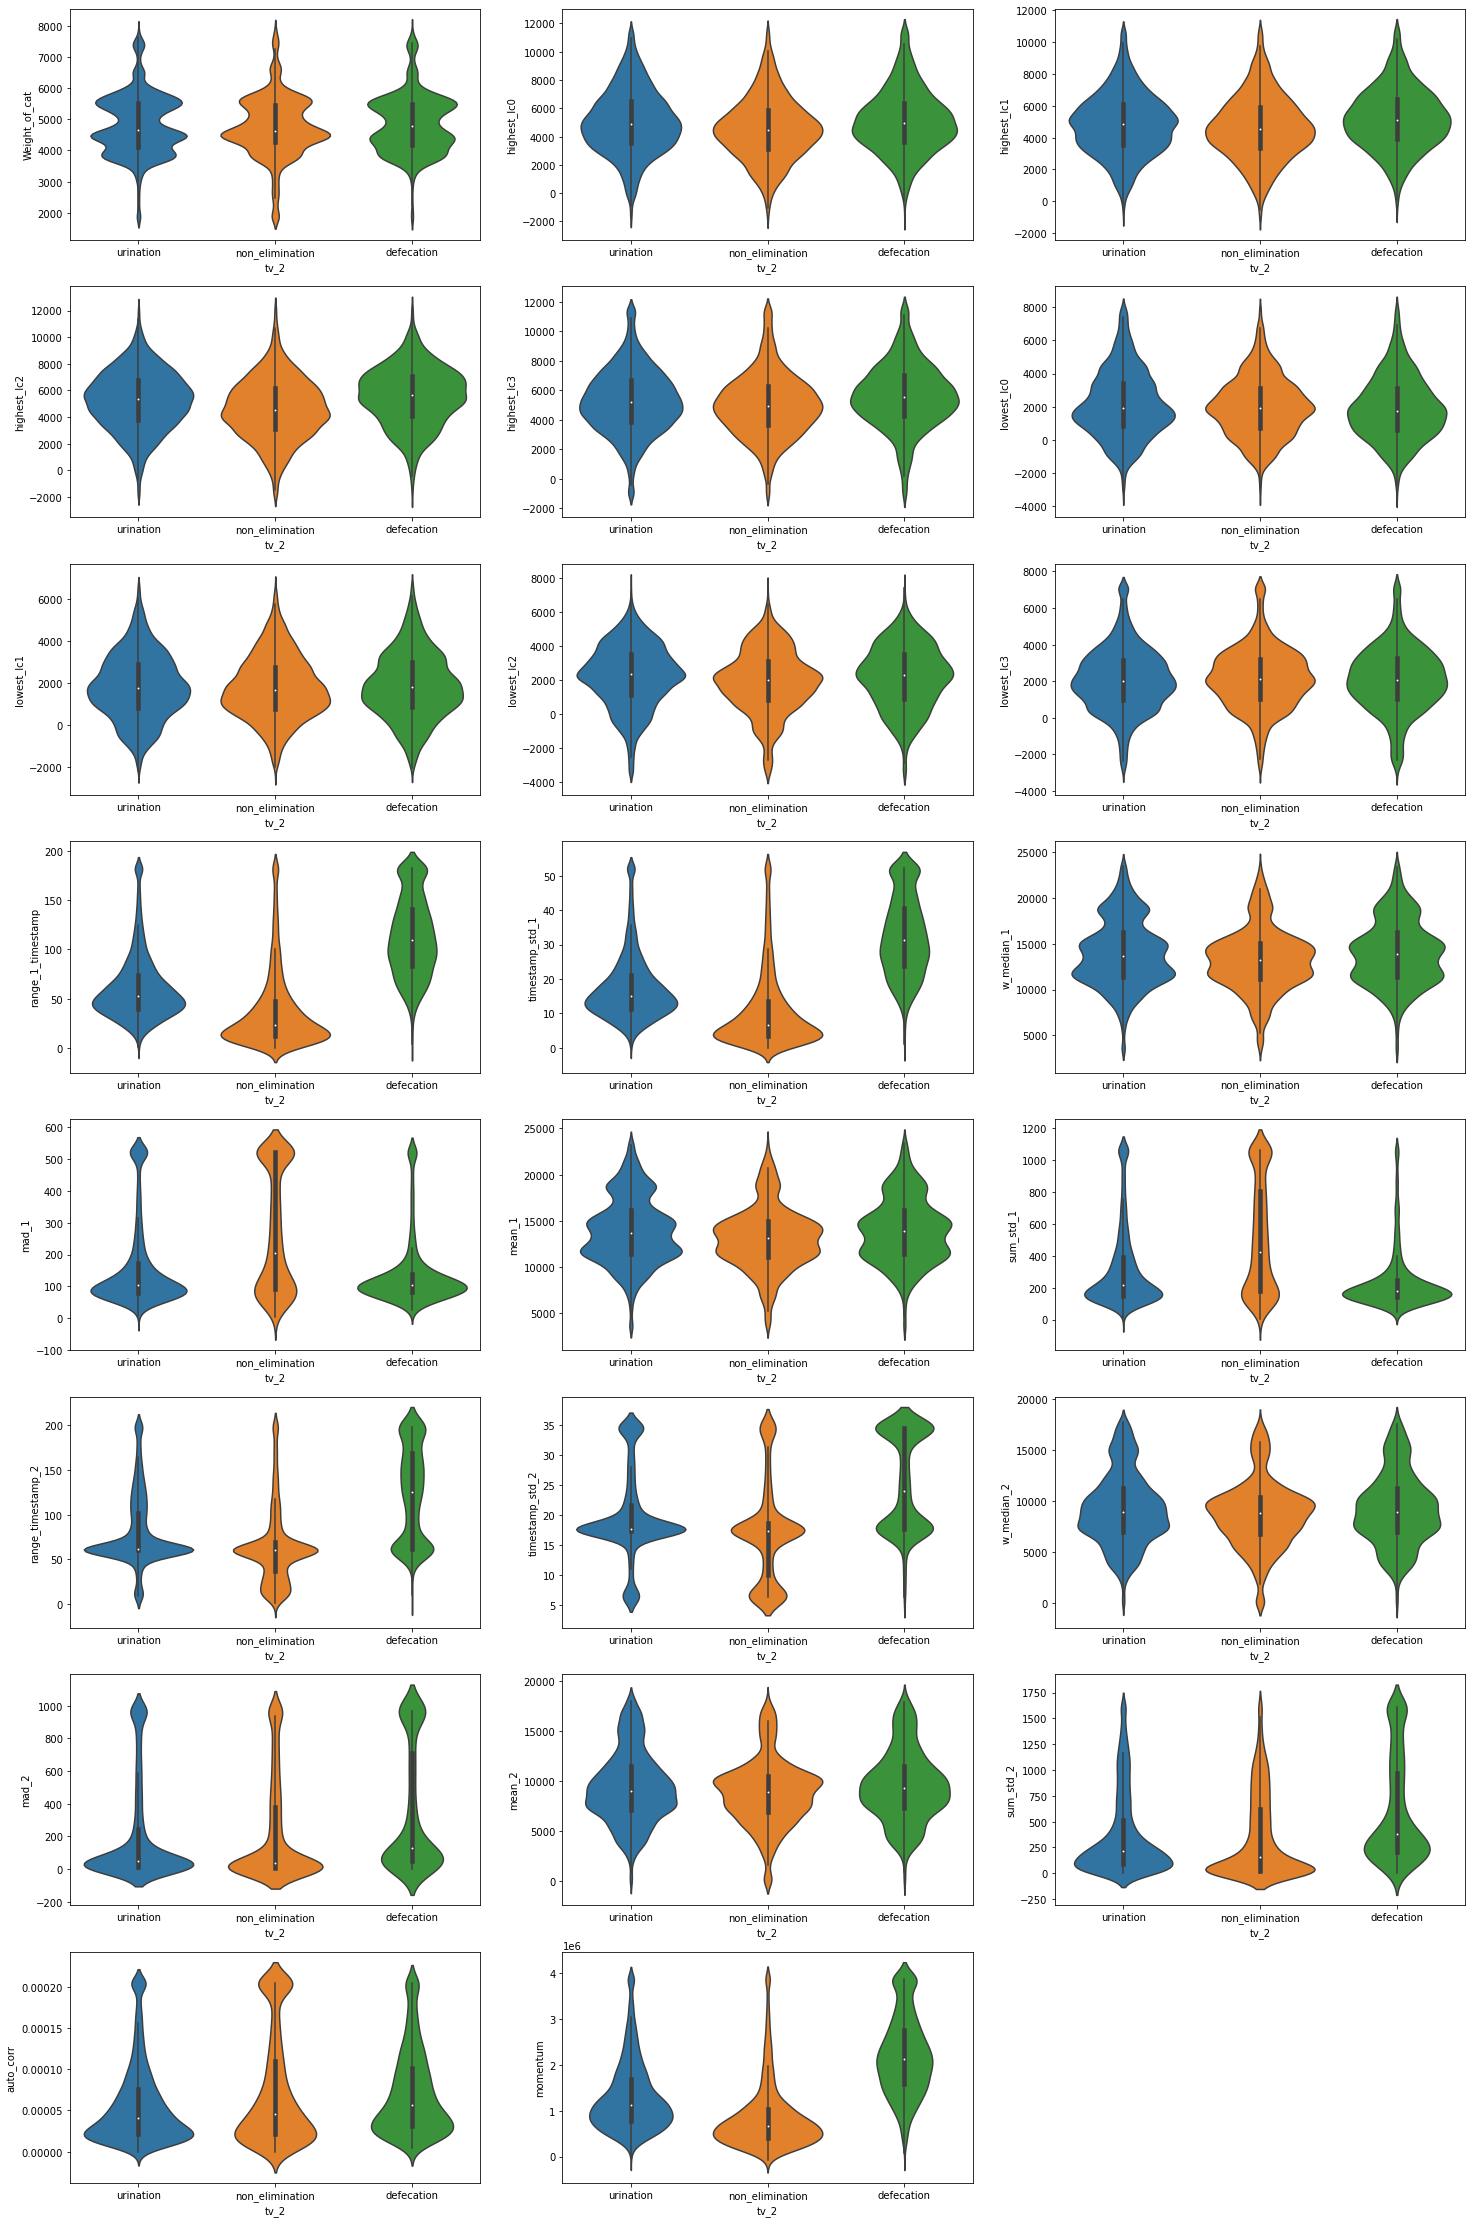

In [163]:
# For Target variables 2: urination and defecation
# green(defecation) and blue(urination) color figures are our need(ignore orange figures)

plt.figure(figsize=(25,40))
i=0
for col in df_case.select_dtypes(exclude=[object]).columns:
    plt.subplot(8,3,i+1)
    i+=1
    sns.violinplot(data = df_case, x='tv_2', y=df_case[col])

In [ ]:
# it was difficult to infer any different idea from violin plot for target variable 2.
# violin plot is showing similar variation as in boxplot.

# Feature Selection

## Correlation among features

<AxesSubplot:>

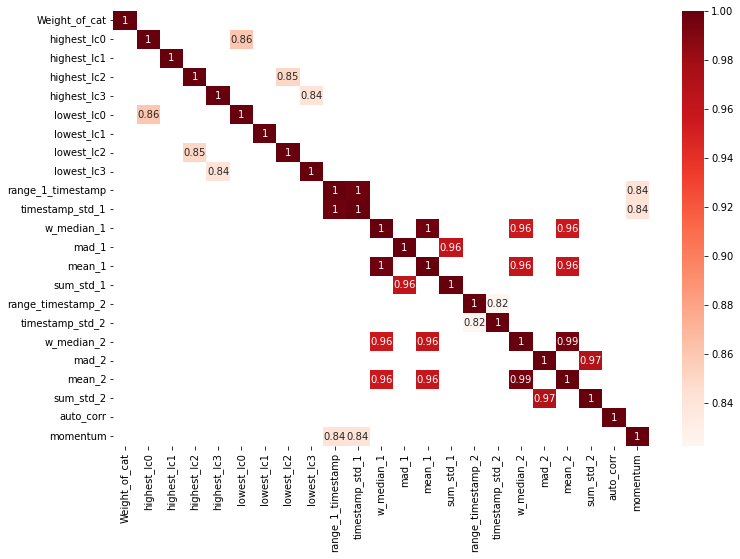

In [173]:
# correlation heatmap for numerical features

plt.figure(figsize=(12,8))
sns.heatmap(df_case.corr()[df_case.corr()>.8], cmap="Reds",annot=True)

In [175]:
df_copy3 = df_case.copy()

In [277]:
#calucalte VIF and eliminate features  having VIF more than 10
collinear_ft = []
vif_min = 15
vif_max = 100
numeric_cols=list(df_copy3.select_dtypes([np.number]).columns)
df_num =df_copy3[numeric_cols]
while vif_max>vif_min:
    df_vif = sm.add_constant(df_num.drop(columns=collinear_ft))
    vif = pd.DataFrame()
    vif['VIF']=[variance_inflation_factor(df_vif.values,i) for i in range(len(df_vif.columns))]
    vif['features']=df_vif.columns
    vif = vif.sort_values(by='VIF',ascending=False).reset_index(drop=True)
    if vif.loc[0,'features']!='const':
        vif_max = vif.loc[0,'VIF']
        collinear_ft.append(vif.loc[0,'features'])
    else:
        vif_max = vif.loc[1,'VIF']
        collinear_ft.append(vif.loc[1,'features'])
vif_ft = list(vif['features'])
vif_ft.remove('const')
vif_ft = [i for i in numeric_cols if i in vif_ft ]
#remaining features after elimination through VIF
print(vif_ft)
#Final VIF value of the remaining feature
print(vif)

['Weight_of_cat', 'highest_lc0', 'highest_lc1', 'highest_lc2', 'highest_lc3', 'lowest_lc0', 'lowest_lc1', 'lowest_lc2', 'lowest_lc3', 'timestamp_std_1', 'mad_1', 'range_timestamp_2', 'timestamp_std_2', 'mad_2', 'auto_corr', 'momentum']
          VIF           features
0   63.649343              const
1   10.726883           momentum
2    9.067674    timestamp_std_1
3    5.810738         lowest_lc0
4    5.331503        highest_lc0
5    5.264081         lowest_lc2
6    5.020119         lowest_lc3
7    4.782245        highest_lc2
8    4.499593        highest_lc3
9    4.420334  range_timestamp_2
10   3.977940         lowest_lc1
11   3.560144        highest_lc1
12   3.429763    timestamp_std_2
13   1.769786          auto_corr
14   1.639036      Weight_of_cat
15   1.542076              mad_2
16   1.388325              mad_1


In [276]:
# Features removed: 'range_1_timestamp', 'w_median_1', 'mean_1', 'sum_std_1' , 'w_median_2', 'mean_2', 'sum_std_2'

<AxesSubplot:>

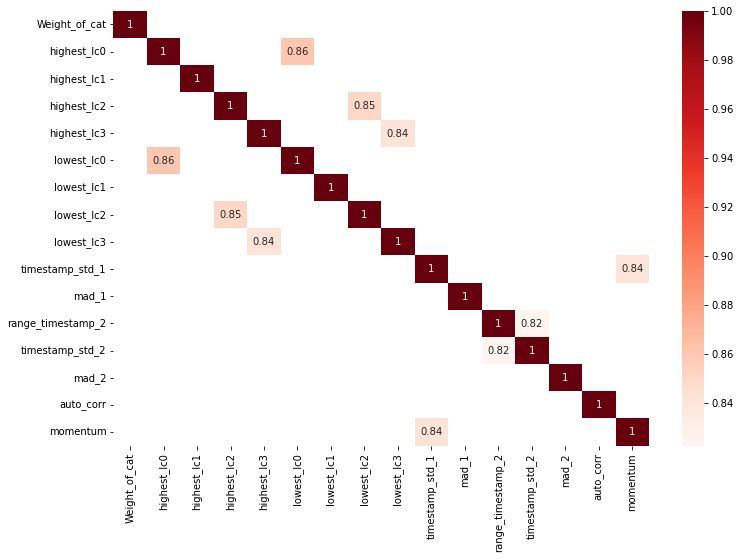

In [278]:
#Correlation heat map after VIF analysis
corr = df_copy3[vif_ft].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[corr>=0.8], cmap="Reds",annot=True)

In [284]:
# not taking VIF as it is decreasing model accuracy
# df = pd.concat([df_copy3[vif_ft], df_case.iloc[:,-1:-3:-1]],axis=1)

In [976]:
df_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13075 entries, 0 to 13074
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight_of_cat      13075 non-null  float64
 1   highest_lc0        13075 non-null  float64
 2   highest_lc1        13075 non-null  float64
 3   highest_lc2        13075 non-null  float64
 4   highest_lc3        13075 non-null  float64
 5   lowest_lc0         13075 non-null  float64
 6   lowest_lc2         13075 non-null  float64
 7   lowest_lc3         13075 non-null  float64
 8   range_1_timestamp  13075 non-null  float64
 9   timestamp_std_1    13075 non-null  float64
 10  w_median_1         13075 non-null  float64
 11  mad_1              13075 non-null  float64
 12  mean_1             13075 non-null  float64
 13  sum_std_1          13075 non-null  float64
 14  range_timestamp_2  13075 non-null  float64
 15  timestamp_std_2    13075 non-null  float64
 16  w_median_2         130

In [580]:
df = df_case
df

,Weight_of_cat,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc1,lowest_lc2,lowest_lc3,range_1_timestamp,...,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum,tv_1,tv_2
0,6589.0,6032.0,6658.0,6208.0,1817.000,2846.0,1893.0,4410.0,-1774.0,44.549942,...,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06,elimination,urination
1,6935.0,7949.0,4983.0,9430.0,-984.125,2981.0,1481.0,3589.0,-2526.0,52.675000,...,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05,elimination,urination
2,5139.0,4136.0,6993.0,6507.0,3740.000,1416.0,2776.0,2953.0,327.0,44.125012,...,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05,elimination,urination
3,6983.0,3618.0,4141.0,5868.0,6284.000,2610.0,2481.0,2885.0,546.0,11.574934,...,54.775006,15.823004,8793.0,8.509305,8798.611770,56.800831,0.000015,5.837676e+05,non_elimination,non_elimination
4,7017.0,4452.0,5248.0,5942.0,2878.000,1308.0,1876.0,1901.0,-442.0,48.775000,...,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05,elimination,urination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,4116.0,6224.0,2958.0,4208.0,3763.000,1787.0,671.0,1340.0,1123.0,48.508258,...,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924,0.000132,6.582192e+05,elimination,urination
13071,4604.0,3649.0,2383.0,7449.0,2142.000,3052.0,148.0,2039.0,1469.0,18.240629,...,132.144766,34.631451,7755.0,6.376389,7758.357361,10.877748,0.000029,1.025311e+06,non_elimination,non_elimination
13072,4416.0,6479.0,4565.0,3946.0,3961.000,4201.0,-72.0,1088.0,1144.0,77.271593,...,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886,0.000039,1.639793e+06,elimination,urination
13073,4386.0,5783.0,2458.0,4474.0,5860.000,2982.0,-1311.0,1399.0,1712.0,182.179435,...,198.181075,34.631451,6336.0,969.481184,7963.687933,1612.294646,0.000084,2.200666e+06,elimination,defecation


#### Feature Selection for Target Variable 1

In [582]:
# independent two sample t-test is used for Hypothesis Test.
# by using p_value we can select features.

In [583]:
gr1= df_case[df_case['tv_1']=='elimination']
gr2= df_case[df_case['tv_1']=='non_elimination']

In [584]:
p=[]
p_col=[]

for col in df_case.select_dtypes([np.number]).columns:
    p_col.append(col)
    p.append(ttest_ind(gr1[col],gr2[col]))

In [585]:
# sorting featues as per p_value in ascending order

feature_tv1 = pd.DataFrame(p_col)
feature_tv1.columns = ['feature_tv1']

p_val_tv1= pd.concat([feature_tv1,pd.DataFrame(p)],axis=1)
p_val_tv1.sort_values('pvalue')

,feature_tv1,statistic,pvalue
22,momentum,44.624588,0.000000e+00
14,sum_std_1,-39.596814,0.000000e+00
12,mad_1,-39.664241,0.000000e+00
9,range_1_timestamp,48.155867,0.000000e+00
10,timestamp_std_1,47.949920,0.000000e+00
15,range_timestamp_2,33.350590,3.964367e-234
16,timestamp_std_2,28.211869,4.910092e-170
3,highest_lc2,17.211914,1.142132e-65
13,mean_1,12.699320,9.828420e-37
21,auto_corr,-12.106879,1.468366e-33


In [586]:
# tv_1
# Features whose p_value > 0.05

p_val_tv1['feature_tv1'][p_val_tv1['pvalue']> 0.05]

6    lowest_lc1
Name: feature_tv1, dtype: object

In [587]:
# For Model 1 : elimination or non_elimination, we can eliminate feature 'lowest_lc1'

#### Feature Selection for Target Variable 2

In [588]:
grp1= df_case[df_case['tv_2']=='defecation']
grp2= df_case[df_case['tv_2']=='urination']

p1=[]
p1_col=[]

for col in df_case.select_dtypes([np.number]).columns:
    p1_col.append(col)
    p1.append(ttest_ind(grp1[col],grp2[col]))

feature_tv2 = pd.DataFrame(p1_col)
feature_tv2.columns = ['feature_tv2']
# sorting featues as per p_value in ascending order

p_val_tv2= pd.concat([feature_tv2,pd.DataFrame(p1)],axis=1)
p_val_tv2.sort_values('pvalue')

,feature_tv2,statistic,pvalue
22,momentum,47.032902,0.000000e+00
9,range_1_timestamp,61.807638,0.000000e+00
10,timestamp_std_1,61.401885,0.000000e+00
15,range_timestamp_2,39.157549,1.222888e-309
16,timestamp_std_2,31.101637,1.011441e-201
20,sum_std_2,22.193399,2.874703e-106
18,mad_2,17.223933,1.992117e-65
14,sum_std_1,-14.540086,2.343046e-47
21,auto_corr,12.325264,1.265624e-34
12,mad_1,-7.749809,1.021105e-14


In [589]:
# tv_2
# Features whose p_value > 0.05

p_val_tv2['feature_tv2'][p_val_tv2['pvalue']> 0.05]

0     Weight_of_cat
1       highest_lc0
6        lowest_lc1
7        lowest_lc2
8        lowest_lc3
11       w_median_1
13           mean_1
17       w_median_2
19           mean_2
Name: feature_tv2, dtype: object

In [590]:
# For Model 2 : urination or defecation,
# we can eliminate features:  Weight_of_cat,highest_lc0,lowest_lc1,lowest_lc2,lowest_lc3,w_median_1,mean_1,w_median_2,mean_2

In [591]:
# Dropping feature 'lowest_lc1' from dataframe as p_value is lower.

df.drop(columns=['lowest_lc1'],inplace=True)

In [592]:
df

,Weight_of_cat,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc2,lowest_lc3,range_1_timestamp,timestamp_std_1,...,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum,tv_1,tv_2
0,6589.0,6032.0,6658.0,6208.0,1817.000,2846.0,4410.0,-1774.0,44.549942,12.871299,...,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06,elimination,urination
1,6935.0,7949.0,4983.0,9430.0,-984.125,2981.0,3589.0,-2526.0,52.675000,15.209673,...,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05,elimination,urination
2,5139.0,4136.0,6993.0,6507.0,3740.000,1416.0,2953.0,327.0,44.125012,12.748615,...,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05,elimination,urination
3,6983.0,3618.0,4141.0,5868.0,6284.000,2610.0,2885.0,546.0,11.574934,3.352232,...,54.775006,15.823004,8793.0,8.509305,8798.611770,56.800831,0.000015,5.837676e+05,non_elimination,non_elimination
4,7017.0,4452.0,5248.0,5942.0,2878.000,1308.0,1901.0,-442.0,48.775000,14.090955,...,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05,elimination,urination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,4116.0,6224.0,2958.0,4208.0,3763.000,1787.0,1340.0,1123.0,48.508258,14.031371,...,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924,0.000132,6.582192e+05,elimination,urination
13071,4604.0,3649.0,2383.0,7449.0,2142.000,3052.0,2039.0,1469.0,18.240629,5.275410,...,132.144766,34.631451,7755.0,6.376389,7758.357361,10.877748,0.000029,1.025311e+06,non_elimination,non_elimination
13072,4416.0,6479.0,4565.0,3946.0,3961.000,4201.0,1088.0,1144.0,77.271593,22.316346,...,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886,0.000039,1.639793e+06,elimination,urination
13073,4386.0,5783.0,2458.0,4474.0,5860.000,2982.0,1399.0,1712.0,182.179435,52.082195,...,198.181075,34.631451,6336.0,969.481184,7963.687933,1612.294646,0.000084,2.200666e+06,elimination,defecation


In [596]:
# Dataframe for model 1: elimination and non_elimination

df_model1 = df.iloc[:,:-1]
df_model1

,Weight_of_cat,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc2,lowest_lc3,range_1_timestamp,timestamp_std_1,...,sum_std_1,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum,tv_1
0,6589.0,6032.0,6658.0,6208.0,1817.000,2846.0,4410.0,-1774.0,44.549942,12.871299,...,565.412482,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06,elimination
1,6935.0,7949.0,4983.0,9430.0,-984.125,2981.0,3589.0,-2526.0,52.675000,15.209673,...,398.282317,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05,elimination
2,5139.0,4136.0,6993.0,6507.0,3740.000,1416.0,2953.0,327.0,44.125012,12.748615,...,521.328658,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05,elimination
3,6983.0,3618.0,4141.0,5868.0,6284.000,2610.0,2885.0,546.0,11.574934,3.352232,...,1059.759216,54.775006,15.823004,8793.0,8.509305,8798.611770,56.800831,0.000015,5.837676e+05,non_elimination
4,7017.0,4452.0,5248.0,5942.0,2878.000,1308.0,1901.0,-442.0,48.775000,14.090955,...,235.912631,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05,elimination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13070,4116.0,6224.0,2958.0,4208.0,3763.000,1787.0,1340.0,1123.0,48.508258,14.031371,...,295.376202,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924,0.000132,6.582192e+05,elimination
13071,4604.0,3649.0,2383.0,7449.0,2142.000,3052.0,2039.0,1469.0,18.240629,5.275410,...,1059.759216,132.144766,34.631451,7755.0,6.376389,7758.357361,10.877748,0.000029,1.025311e+06,non_elimination
13072,4416.0,6479.0,4565.0,3946.0,3961.000,4201.0,1088.0,1144.0,77.271593,22.316346,...,124.618100,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886,0.000039,1.639793e+06,elimination
13073,4386.0,5783.0,2458.0,4474.0,5860.000,2982.0,1399.0,1712.0,182.179435,52.082195,...,110.663980,198.181075,34.631451,6336.0,969.481184,7963.687933,1612.294646,0.000084,2.200666e+06,elimination


In [601]:
# Dataframe for model 2: urination and defecation
df_copy1 = df.copy()
df_model2 = df.drop(columns=['tv_1'])

In [603]:
df_model2 = df_model2[df_model2['tv_2'] != 'non_elimination']
df_model2

,Weight_of_cat,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc2,lowest_lc3,range_1_timestamp,timestamp_std_1,...,sum_std_1,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum,tv_2
0,6589.0,6032.0,6658.0,6208.0,1817.000,2846.0,4410.0,-1774.0,44.549942,12.871299,...,565.412482,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06,urination
1,6935.0,7949.0,4983.0,9430.0,-984.125,2981.0,3589.0,-2526.0,52.675000,15.209673,...,398.282317,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05,urination
2,5139.0,4136.0,6993.0,6507.0,3740.000,1416.0,2953.0,327.0,44.125012,12.748615,...,521.328658,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05,urination
4,7017.0,4452.0,5248.0,5942.0,2878.000,1308.0,1901.0,-442.0,48.775000,14.090955,...,235.912631,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05,urination
5,6105.0,4650.0,5459.0,6149.0,1590.000,2310.0,3623.0,-1100.0,44.074933,12.734179,...,607.594827,54.274998,15.678669,7709.0,70.463043,7747.738029,231.705751,0.000013,7.593561e+05,urination
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,4420.0,6781.0,3947.0,3598.0,6172.000,3257.0,747.0,2460.0,182.179435,52.082195,...,152.629623,166.441796,17.564929,7350.0,16.367702,7358.639453,156.137675,0.000092,3.292047e+06,defecation
13070,4116.0,6224.0,2958.0,4208.0,3763.000,1787.0,1340.0,1123.0,48.508258,14.031371,...,295.376202,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924,0.000132,6.582192e+05,urination
13072,4416.0,6479.0,4565.0,3946.0,3961.000,4201.0,1088.0,1144.0,77.271593,22.316346,...,124.618100,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886,0.000039,1.639793e+06,urination
13073,4386.0,5783.0,2458.0,4474.0,5860.000,2982.0,1399.0,1712.0,182.179435,52.082195,...,110.663980,198.181075,34.631451,6336.0,969.481184,7963.687933,1612.294646,0.000084,2.200666e+06,defecation


In [604]:
# Target Variable for model 1
#Enocding the target variable to non_elimination=0 & elimination=1

df_model1['tv_1']= df_model1['tv_1'].map({'non_elimination':0,'elimination':1})

In [605]:
# Target Variable for model 2
#Enocding the target variable to defecation=0 & urination=1

df_model2['tv_2']= df_model2['tv_2'].map({'defecation':0,'urination':1})

In [978]:
df_model1.shape

(13075, 23)

In [606]:
df_model2

,Weight_of_cat,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc2,lowest_lc3,range_1_timestamp,timestamp_std_1,...,sum_std_1,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum,tv_2
0,6589.0,6032.0,6658.0,6208.0,1817.000,2846.0,4410.0,-1774.0,44.549942,12.871299,...,565.412482,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06,1
1,6935.0,7949.0,4983.0,9430.0,-984.125,2981.0,3589.0,-2526.0,52.675000,15.209673,...,398.282317,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05,1
2,5139.0,4136.0,6993.0,6507.0,3740.000,1416.0,2953.0,327.0,44.125012,12.748615,...,521.328658,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05,1
4,7017.0,4452.0,5248.0,5942.0,2878.000,1308.0,1901.0,-442.0,48.775000,14.090955,...,235.912631,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05,1
5,6105.0,4650.0,5459.0,6149.0,1590.000,2310.0,3623.0,-1100.0,44.074933,12.734179,...,607.594827,54.274998,15.678669,7709.0,70.463043,7747.738029,231.705751,0.000013,7.593561e+05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,4420.0,6781.0,3947.0,3598.0,6172.000,3257.0,747.0,2460.0,182.179435,52.082195,...,152.629623,166.441796,17.564929,7350.0,16.367702,7358.639453,156.137675,0.000092,3.292047e+06,0
13070,4116.0,6224.0,2958.0,4208.0,3763.000,1787.0,1340.0,1123.0,48.508258,14.031371,...,295.376202,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924,0.000132,6.582192e+05,1
13072,4416.0,6479.0,4565.0,3946.0,3961.000,4201.0,1088.0,1144.0,77.271593,22.316346,...,124.618100,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886,0.000039,1.639793e+06,1
13073,4386.0,5783.0,2458.0,4474.0,5860.000,2982.0,1399.0,1712.0,182.179435,52.082195,...,110.663980,198.181075,34.631451,6336.0,969.481184,7963.687933,1612.294646,0.000084,2.200666e+06,0


# Model 1 (Elimination and Non-elimination)

## 1. Logistic Regression model 1

In [607]:
df_model1_X = df_model1.iloc[:, :-1].values
df_model1_y = df_model1.iloc[:, -1].values

In [608]:

X_train_df_model1, X_test_df_model1, y_train_df_model1, y_test_df_model1 = train_test_split(df_model1_X, df_model1_y, test_size = 0.25, random_state = 0)


In [609]:
sc = StandardScaler()
X_train_df_model1 = sc.fit_transform(X_train_df_model1)
X_test_df_model1 = sc.transform(X_test_df_model1)

In [610]:
classifier = LogisticRegression()


In [611]:
## Hyperparameter tuning for Logistic regression

In [612]:
param_grid = [
    {
        'penalty': ['l1','l2','elasticnet','none'],
        'C': np.logspace(-4,4,20),
        'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter':[100,1000,2500,5000]
    }
]

In [613]:
clf = GridSearchCV(classifier, param_grid = param_grid, cv=10, verbose=True, n_jobs=-1)

In [614]:
best_clf = clf.fit(X_train_df_model1, y_train_df_model1)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


In [833]:
# optimized hypertune parameter

best_clf.best_params_

{'C': 0.615848211066026,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [616]:
print(f'Accuracy - : {best_clf.score(X_train_df_model1, y_train_df_model1):.3f}')

Accuracy - : 0.808


In [898]:
# fitting the data in the classifier

classifier = LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear',max_iter= 100)
classifier.fit(X_train_df_model1, y_train_df_model1)

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [836]:
#prediction for train data
y_train_predict_df_model1 = classifier.predict(X_train_df_model1)

#prediction for test data
y_pred_df_model1 = classifier.predict(X_test_df_model1)

In [837]:
# Test score

cm_model1 = confusion_matrix(y_test_df_model1, y_pred_df_model1)
print(cm_model1)
accuracy_score(y_test_df_model1, y_pred_df_model1)

[[ 538  514]
 [ 168 2049]]


0.7913735087182625

<AxesSubplot:>

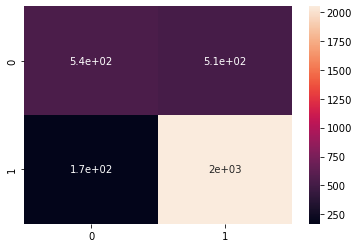

In [838]:
sns.heatmap(cm_model1, annot = True)

In [839]:
#Test report

print(classification_report(y_test_df_model1, y_pred_df_model1))

              precision    recall  f1-score   support

           0       0.76      0.51      0.61      1052
           1       0.80      0.92      0.86      2217

    accuracy                           0.79      3269
   macro avg       0.78      0.72      0.73      3269
weighted avg       0.79      0.79      0.78      3269



In [840]:
#Train report

print(classification_report(y_train_df_model1,y_train_predict_df_model1))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64      3097
           1       0.82      0.93      0.87      6709

    accuracy                           0.81      9806
   macro avg       0.80      0.74      0.76      9806
weighted avg       0.81      0.81      0.80      9806



In [841]:
df_model1.columns

Index(['Weight_of_cat', 'highest_lc0', 'highest_lc1', 'highest_lc2',
       'highest_lc3', 'lowest_lc0', 'lowest_lc2', 'lowest_lc3',
       'range_1_timestamp', 'timestamp_std_1', 'w_median_1', 'mad_1', 'mean_1',
       'sum_std_1', 'range_timestamp_2', 'timestamp_std_2', 'w_median_2',
       'mad_2', 'mean_2', 'sum_std_2', 'auto_corr', 'momentum', 'tv_1'],
      dtype='object')

In [842]:
chosen_features = ['Weight_of_cat', 'highest_lc0', 'highest_lc1', 'highest_lc2',
       'highest_lc3', 'lowest_lc0', 'lowest_lc2', 'lowest_lc3',
       'range_1_timestamp', 'timestamp_std_1', 'w_median_1', 'mad_1', 'mean_1',
       'sum_std_1', 'range_timestamp_2', 'timestamp_std_2', 'w_median_2',
       'mad_2', 'mean_2', 'sum_std_2', 'auto_corr', 'momentum']


pd.DataFrame(classifier.coef_[0], index=chosen_features, columns=["Coefficient"])


,Coefficient
Weight_of_cat,-0.586492
highest_lc0,0.265826
highest_lc1,-0.044630
highest_lc2,0.274395
highest_lc3,0.193508
lowest_lc0,-0.390678
lowest_lc2,-0.326131
lowest_lc3,-0.406315
range_1_timestamp,2.178834
timestamp_std_1,-1.296696


Text(0, 0.5, 'Features')

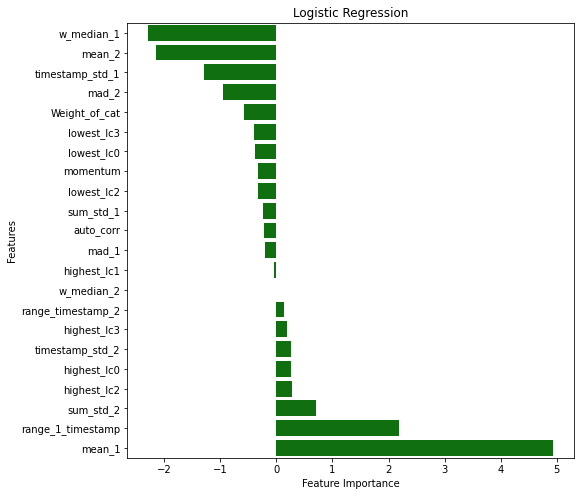

In [1018]:
# plot feature importance

feature_importance = np.array(classifier.coef_[0])
feature_names = np.array(chosen_features)

data={'feature_names':feature_names,'feature_importance':feature_importance}
feature_df = pd.DataFrame(data)

feature_df.sort_values(by=['feature_importance'],inplace=True)
plt.figure(figsize=(8,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'], color='g')
plt.title('Logistic Regression')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

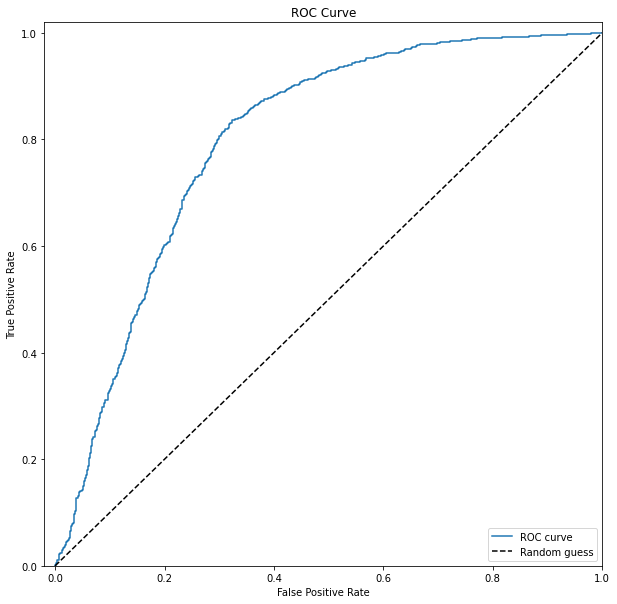

In [900]:
y_pred_df_model1_proba = classifier.predict_proba(X_test_df_model1)[::,1]

fpr, tpr, thresholds = roc_curve(y_test_df_model1, y_pred_df_model1_proba)

plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")



In [901]:
print('roc_auc_score: ', roc_auc_score(y_test_df_model1, y_pred_df_model1_proba))

roc_auc_score:  0.798043034210242


## 2.KNN Model 1

In [ ]:
# Hyperparameter tuning for KNN

In [647]:

knn_params={
    'n_neighbors': range(1,40,1)
        }

knn = KNeighborsClassifier()

#grid search

grid_search = GridSearchCV(estimator= knn, param_grid= knn_params, cv=10,scoring='accuracy',n_jobs=1)
grid_results = grid_search.fit(X_train_df_model1, y_train_df_model1)


grid_results.best_estimator_


KNeighborsClassifier(n_neighbors=9)

In [902]:
#best model for knn
final_model_knn = KNeighborsClassifier(n_neighbors=9 ,metric='minkowski')
final_model_knn.fit(X_train_df_model1, y_train_df_model1)

KNeighborsClassifier(n_neighbors=9)

In [649]:
#prediction for train data
y_train_predict_knn_df_model1 = final_model_knn.predict(X_train_df_model1)

#prediction for test data
y_pred_knn_df_model1 = final_model_knn.predict(X_test_df_model1)

In [650]:
# Test score

cm_knn_model1 = confusion_matrix(y_test_df_model1, y_pred_knn_df_model1)
print(cm_knn_model1)
accuracy_score(y_test_df_model1, y_pred_knn_df_model1)

[[ 629  423]
 [ 105 2112]]


0.8384827164270419

<AxesSubplot:>

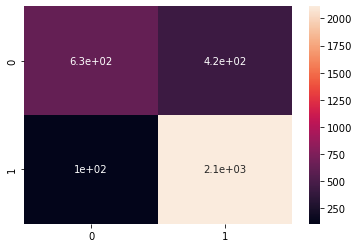

In [709]:
sns.heatmap(cm_knn_model1, annot = True)

In [651]:
#Test report

print(classification_report(y_test_df_model1, y_pred_knn_df_model1))

              precision    recall  f1-score   support

           0       0.86      0.60      0.70      1052
           1       0.83      0.95      0.89      2217

    accuracy                           0.84      3269
   macro avg       0.85      0.78      0.80      3269
weighted avg       0.84      0.84      0.83      3269



In [652]:
#Train report

print(classification_report(y_train_df_model1,y_train_predict_knn_df_model1))

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      3097
           1       0.86      0.97      0.91      6709

    accuracy                           0.87      9806
   macro avg       0.88      0.81      0.84      9806
weighted avg       0.87      0.87      0.86      9806



Feature: 0, Score: 0.01407
Feature: 1, Score: 0.00910
Feature: 2, Score: 0.00771
Feature: 3, Score: 0.00842
Feature: 4, Score: 0.00345
Feature: 5, Score: 0.00971
Feature: 6, Score: 0.00612
Feature: 7, Score: 0.00551
Feature: 8, Score: 0.02411
Feature: 9, Score: 0.02352
Feature: 10, Score: 0.00328
Feature: 11, Score: 0.02258
Feature: 12, Score: 0.00216
Feature: 13, Score: 0.01791
Feature: 14, Score: 0.01120
Feature: 15, Score: 0.00918
Feature: 16, Score: 0.00361
Feature: 17, Score: 0.01103
Feature: 18, Score: 0.00318
Feature: 19, Score: 0.00808
Feature: 20, Score: 0.01371
Feature: 21, Score: 0.01148


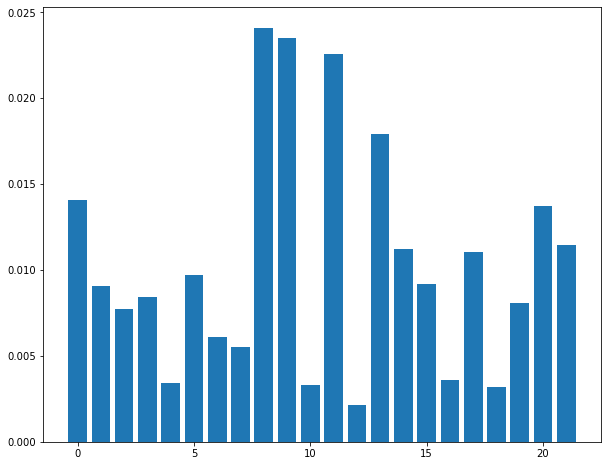

In [792]:
# perform permutation importance
results = permutation_importance(final_model_knn, X_train_df_model1, y_train_df_model1, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,8))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

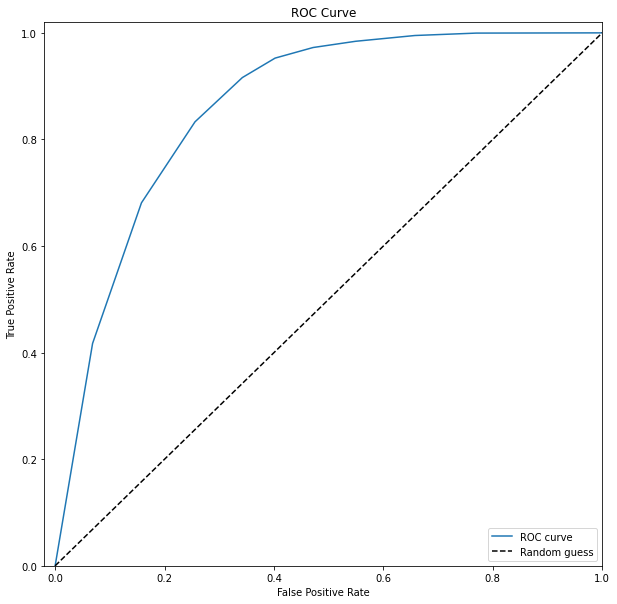

In [906]:
y_pred_knn_df_model1_proba = final_model_knn.predict_proba(X_test_df_model1)[::,1]


fpr, tpr, thresholds = roc_curve(y_test_df_model1, y_pred_knn_df_model1_proba)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [907]:
print('roc_auc_score: ', roc_auc_score(y_test_df_model1, y_pred_knn_df_model1_proba))

roc_auc_score:  0.8612291642012722


## 3.Random Forest Model 1

In [657]:
# Test result without hyperparameter tunning

rf_classifier_df_model1 = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
rf_classifier_df_model1.fit(X_train_df_model1, y_train_df_model1)

y_pred_rf_df_model1 = rf_classifier_df_model1.predict(X_test_df_model1)
print(np.concatenate((y_pred_rf_df_model1.reshape(len(y_pred_rf_df_model1),1), y_test_df_model1.reshape(len(y_test_df_model1),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf_df_model1 = confusion_matrix(y_test_df_model1, y_pred_rf_df_model1)
print(cm_rf_df_model1)
accuracy_score(y_test_df_model1, y_pred_rf_df_model1)

[[1 1]
 [1 1]
 [1 1]
 ...
 [0 1]
 [1 1]
 [1 1]]
[[ 709  343]
 [  89 2128]]


0.8678494952584889

In [946]:
# Hyperparameter tuning using RandomizedSearchCV

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [947]:
rf = RandomForestClassifier()

In [948]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [949]:
rf_random.fit(X_train_df_model1, y_train_df_model1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [951]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [952]:
randmf = RandomForestClassifier(n_estimators = 50, min_samples_split = 6, min_samples_leaf= 1, max_features = 'auto', max_depth= 110, bootstrap=False) 
randmf.fit( X_train_df_model1, y_train_df_model1) 

RandomForestClassifier(bootstrap=False, max_depth=110, min_samples_split=6,
                       n_estimators=50)

In [953]:
#prediction for train data
y_train_predict_rf_df_model1 = randmf.predict(X_train_df_model1)

#prediction for test data
y_pred_rf_df_model1 = randmf.predict(X_test_df_model1)

In [954]:
cm_rf_df_model1 = confusion_matrix(y_test_df_model1, y_pred_rf_df_model1)
print(cm_rf_df_model1)
accuracy_score(y_test_df_model1, y_pred_rf_df_model1)

[[ 728  324]
 [ 105 2112]]


0.8687672070969715

In [955]:
cm_rf_df_model1 = confusion_matrix(y_test_df_model1, y_pred_rf_df_model1)
print(cm_rf_df_model1)

[[ 728  324]
 [ 105 2112]]


<AxesSubplot:>

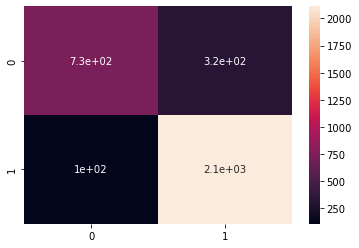

In [956]:
sns.heatmap(cm_rf_df_model1, annot = True)

In [957]:
#Test score

print(classification_report(y_test_df_model1, y_pred_rf_df_model1))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      1052
           1       0.87      0.95      0.91      2217

    accuracy                           0.87      3269
   macro avg       0.87      0.82      0.84      3269
weighted avg       0.87      0.87      0.86      3269



In [958]:
# Train score

print(classification_report(y_train_df_model1, y_train_predict_rf_df_model1 ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3097
           1       1.00      1.00      1.00      6709

    accuracy                           1.00      9806
   macro avg       1.00      1.00      1.00      9806
weighted avg       1.00      1.00      1.00      9806



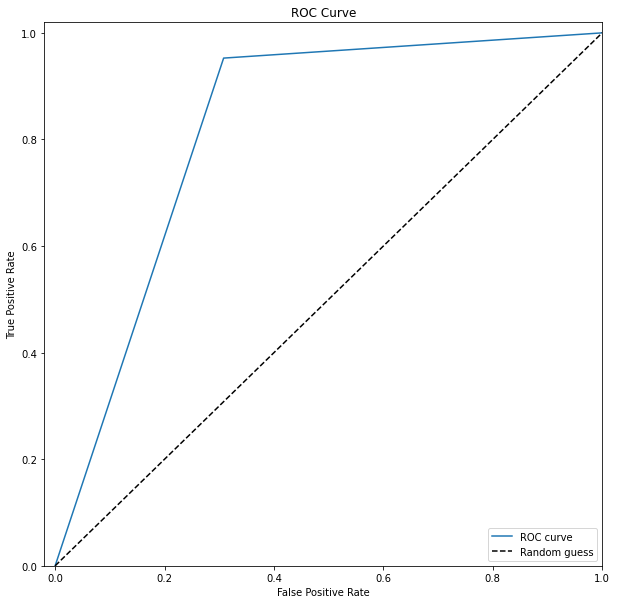

In [959]:
y_pred_rf_df_model1_proba = randmf.predict_proba(X_test_df_model1)[::,1]


fpr, tpr, thresholds = roc_curve(y_test_df_model1, y_pred_rf_df_model1)

plt.subplots(1, figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [960]:
print('roc_auc_score: ', roc_auc_score(y_test_df_model1, y_pred_rf_df_model1_proba))

roc_auc_score:  0.903021030028933


Text(0, 0.5, 'Features')

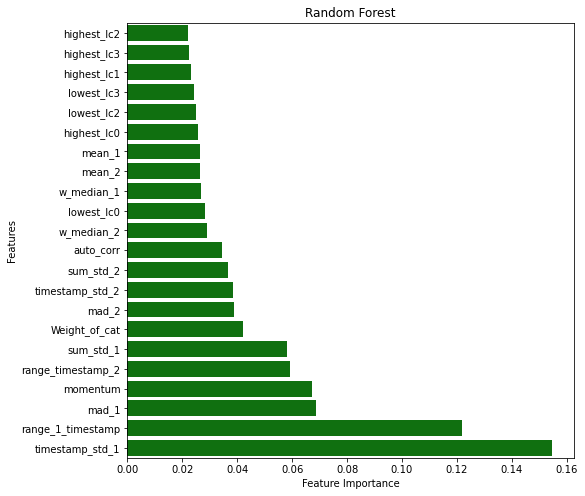

In [1016]:
# plot feature importance

feature_importance = np.array(randmf.feature_importances_)
feature_names = np.array(chosen_features)

data={'feature_names':feature_names,'feature_importance':feature_importance}
feature_df = pd.DataFrame(data)

feature_df.sort_values(by=['feature_importance'],inplace=True)
plt.figure(figsize=(8,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'], color='g')
plt.title('Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

## 4.Decision Tress Model 1

In [758]:
# Hyperparameter tunning for decision tree

dt_params= {'max_depth':np.arange(3,15,1),
            'min_samples_leaf':randint(1,50),
            'criterion': ['gini', 'entropy', 'log_loss']
            }
# Decision tree classifier
tree = DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, dt_params, cv=10)

# Fit to the data
tree_cv.fit(X_train_df_model1, y_train_df_model1)

# print tuned parameters
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 31}

In [759]:
tree_cv.best_score_

0.8378530861886038

In [962]:
#best model for knn
final_model_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 12, min_samples_leaf= 31, random_state=0)
final_model_tree.fit(X_train_df_model1, y_train_df_model1)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=31, random_state=0)

In [964]:
#prediction for train data
y_train_predict_tree_df_model1 = final_model_tree.predict(X_train_df_model1)

#prediction for test data
y_pred_tree_df_model1 = final_model_tree.predict(X_test_df_model1)

In [965]:
# Test score

cm_tree_model1 = confusion_matrix(y_test_df_model1, y_pred_tree_df_model1)
print(cm_tree_model1)
accuracy_score(y_test_df_model1, y_pred_tree_df_model1)

[[ 676  376]
 [ 174 2043]]


0.831752829611502

<AxesSubplot:>

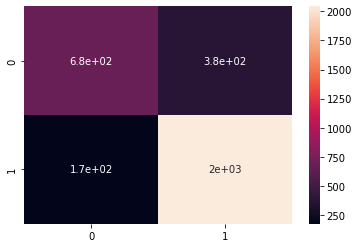

In [966]:
sns.heatmap(cm_tree_model1, annot = True)

In [967]:
#Test report

print(classification_report(y_test_df_model1, y_pred_tree_df_model1))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71      1052
           1       0.84      0.92      0.88      2217

    accuracy                           0.83      3269
   macro avg       0.82      0.78      0.80      3269
weighted avg       0.83      0.83      0.83      3269



In [968]:
#Train report

print(classification_report(y_train_df_model1,y_train_predict_tree_df_model1))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77      3097
           1       0.87      0.94      0.91      6709

    accuracy                           0.87      9806
   macro avg       0.86      0.82      0.84      9806
weighted avg       0.86      0.87      0.86      9806



Text(0, 0.5, 'Features')

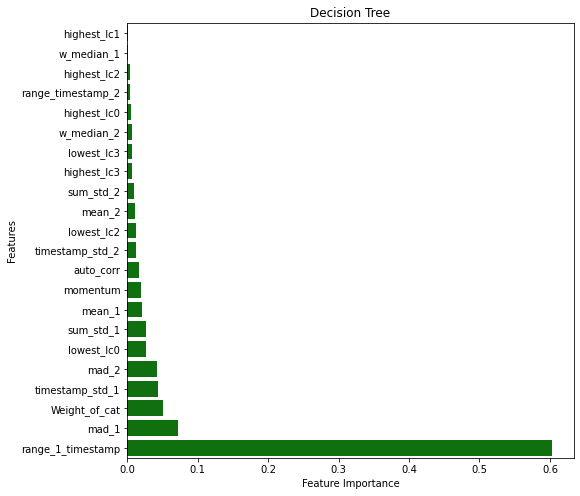

In [1017]:
# plot feature importance

feature_importance = np.array(final_model_tree.feature_importances_)
feature_names = np.array(chosen_features)

data={'feature_names':feature_names,'feature_importance':feature_importance}
feature_df = pd.DataFrame(data)

feature_df.sort_values(by=['feature_importance'],inplace=True)
plt.figure(figsize=(8,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'], color='g')
plt.title('Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

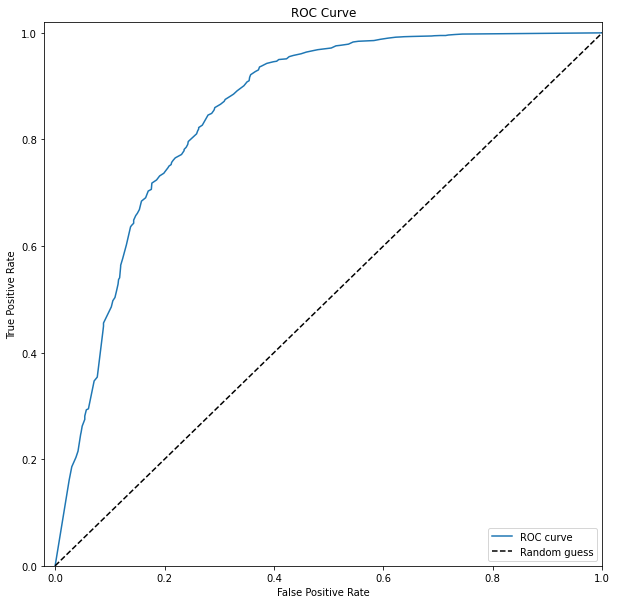

In [970]:
y_pred_tree_df_model1_proba = final_model_tree.predict_proba(X_test_df_model1)[::,1]

fpr, tpr, thresholds = roc_curve(y_test_df_model1, y_pred_tree_df_model1_proba)

plt.subplots(1, figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [971]:
print('roc_auc_score: ', roc_auc_score(y_test_df_model1, y_pred_tree_df_model1_proba))

roc_auc_score:  0.8538239768398703


###############

# Model 2 (Urination or Defecation)

In [826]:
df_model2

,Weight_of_cat,highest_lc0,highest_lc1,highest_lc2,highest_lc3,lowest_lc0,lowest_lc2,lowest_lc3,range_1_timestamp,timestamp_std_1,...,sum_std_1,range_timestamp_2,timestamp_std_2,w_median_2,mad_2,mean_2,sum_std_2,auto_corr,momentum,tv_2
0,6589.0,6032.0,6658.0,6208.0,1817.000,2846.0,4410.0,-1774.0,44.549942,12.871299,...,565.412482,107.399994,31.014534,8211.0,5.463397,8214.992553,50.619210,0.000110,1.248322e+06,1
1,6935.0,7949.0,4983.0,9430.0,-984.125,2981.0,3589.0,-2526.0,52.675000,15.209673,...,398.282317,59.425000,17.129352,6799.0,12.516879,6806.974294,84.821128,0.000055,7.642294e+05,1
2,5139.0,4136.0,6993.0,6507.0,3740.000,1416.0,2953.0,327.0,44.125012,12.748615,...,521.328658,102.374944,19.628288,8776.0,89.940081,8837.441631,248.136950,0.000032,9.085776e+05,1
4,7017.0,4452.0,5248.0,5942.0,2878.000,1308.0,1901.0,-442.0,48.775000,14.090955,...,235.912631,33.575000,9.703092,4765.0,229.879811,4887.061756,595.302251,0.000036,9.484246e+05,1
5,6105.0,4650.0,5459.0,6149.0,1590.000,2310.0,3623.0,-1100.0,44.074933,12.734179,...,607.594827,54.274998,15.678669,7709.0,70.463043,7747.738029,231.705751,0.000013,7.593561e+05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13068,4420.0,6781.0,3947.0,3598.0,6172.000,3257.0,747.0,2460.0,182.179435,52.082195,...,152.629623,166.441796,17.564929,7350.0,16.367702,7358.639453,156.137675,0.000092,3.292047e+06,0
13070,4116.0,6224.0,2958.0,4208.0,3763.000,1787.0,1340.0,1123.0,48.508258,14.031371,...,295.376202,59.125914,8.443558,7031.0,251.246849,7154.556818,634.999924,0.000132,6.582192e+05,1
13072,4416.0,6479.0,4565.0,3946.0,3961.000,4201.0,1088.0,1144.0,77.271593,22.316346,...,124.618100,60.527516,17.482355,7600.0,27.487322,7615.465049,139.694886,0.000039,1.639793e+06,1
13073,4386.0,5783.0,2458.0,4474.0,5860.000,2982.0,1399.0,1712.0,182.179435,52.082195,...,110.663980,198.181075,34.631451,6336.0,969.481184,7963.687933,1612.294646,0.000084,2.200666e+06,0


In [832]:
X = df_model2.iloc[:, :-1].values
y = df_model2.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 1. Logistic Regression model 2

In [919]:
classifier2 = LogisticRegression()


## Hyperparameter tuning for Logistic regression

param_grid2 = [
    {
        'penalty': ['l1','l2','elasticnet','none'],
        'C': np.logspace(-4,4,20),
        'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter':[100,1000,2500,5000]
    }
]

clf2 = GridSearchCV(classifier2, param_grid = param_grid2, cv=10, verbose=True, n_jobs=-1)

best_clf2 = clf2.fit(X_train, y_train)

# optimized hypertune parameter

best_clf2.best_params_

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


{'C': 0.0018329807108324356,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [920]:
# fitting the data in the classifier

classifier_2 = LogisticRegression(C=0.0018329807108324356, penalty='l2', solver='liblinear',max_iter= 100)
classifier_2.fit(X_train, y_train)

#prediction for train data
y_train_predict = classifier_2.predict(X_train)

#prediction for test data
y_pred = classifier_2.predict(X_test)

# Test score

cm= confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 333  252]
 [ 175 1472]]


0.8086917562724014

<AxesSubplot:>

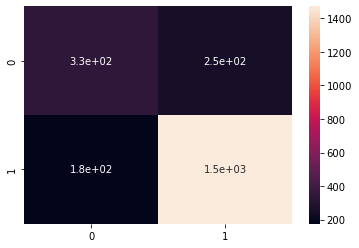

In [921]:
sns.heatmap(cm, annot = True)

In [922]:
#Test report

print(classification_report(y_test, y_pred))

#Train report

print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       585
           1       0.85      0.89      0.87      1647

    accuracy                           0.81      2232
   macro avg       0.75      0.73      0.74      2232
weighted avg       0.80      0.81      0.80      2232

              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1731
           1       0.85      0.91      0.88      4963

    accuracy                           0.81      6694
   macro avg       0.76      0.72      0.74      6694
weighted avg       0.80      0.81      0.81      6694



Text(0, 0.5, 'Features')

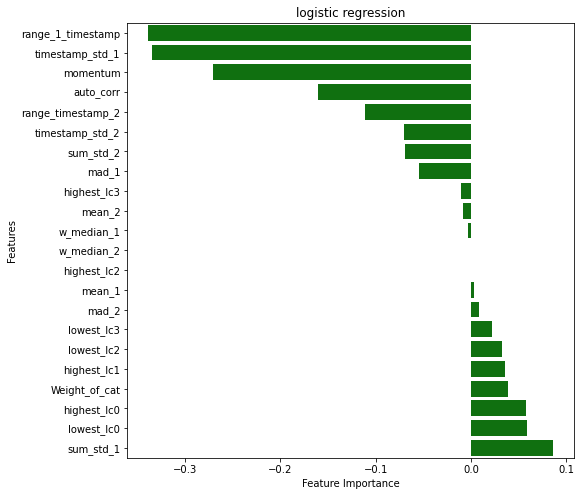

In [997]:
# plot feature importance

feature_importance = np.array(classifier_2.coef_[0])
feature_names = np.array(chosen_features)

#Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
feature_df = pd.DataFrame(data)

feature_df.sort_values(by=['feature_importance'],inplace=True)
plt.figure(figsize=(8,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'], color='g')
plt.title('logistic regression')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

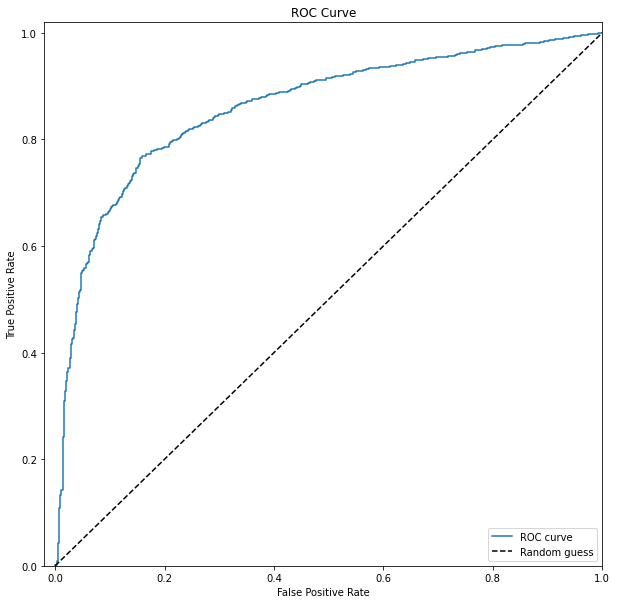

In [925]:
y_pred_proba = classifier_2.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")



In [926]:
print('roc_auc_score: ', roc_auc_score(y_test, y_pred_proba))

roc_auc_score:  0.8599359623039039


# 2. KNN Model 2

In [885]:
# Hyperparameter tuning for KNN

knn_params2={
    'n_neighbors': range(1,40,1)
        }

knn2 = KNeighborsClassifier()

#grid search

grid_search2 = GridSearchCV(estimator= knn2, param_grid= knn_params2, cv=10,scoring='accuracy',n_jobs=1)
grid_results2 = grid_search.fit(X_train, y_train)


grid_results2.best_estimator_


KNeighborsClassifier(n_neighbors=10)

In [927]:
#best model for knn
final_model_knn2 = KNeighborsClassifier(n_neighbors=10 ,metric='minkowski')
final_model_knn2.fit(X_train, y_train)

#prediction for train data
y_train_predict_knn = final_model_knn2.predict(X_train)

#prediction for test data
y_pred_knn = final_model_knn2.predict(X_test)

# Test score

cm_knn= confusion_matrix(y_test, y_pred_knn)
print(cm_knn)
accuracy_score(y_test, y_pred_knn)

[[ 418  167]
 [ 198 1449]]


0.8364695340501792

<AxesSubplot:>

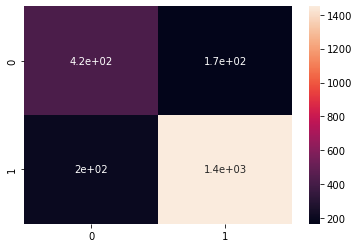

In [928]:
sns.heatmap(cm_knn, annot = True)

In [929]:

#Test report

print(classification_report(y_test, y_pred_knn))

#Train report

print(classification_report(y_train,y_train_predict_knn))

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       585
           1       0.90      0.88      0.89      1647

    accuracy                           0.84      2232
   macro avg       0.79      0.80      0.79      2232
weighted avg       0.84      0.84      0.84      2232

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1731
           1       0.91      0.91      0.91      4963

    accuracy                           0.87      6694
   macro avg       0.83      0.83      0.83      6694
weighted avg       0.87      0.87      0.87      6694



Feature: 0, Score: 0.01276
Feature: 1, Score: 0.00466
Feature: 2, Score: 0.01201
Feature: 3, Score: 0.00493
Feature: 4, Score: 0.00577
Feature: 5, Score: 0.00457
Feature: 6, Score: 0.00968
Feature: 7, Score: 0.00520
Feature: 8, Score: 0.02399
Feature: 9, Score: 0.02184
Feature: 10, Score: 0.00350
Feature: 11, Score: 0.00565
Feature: 12, Score: 0.00335
Feature: 13, Score: 0.00140
Feature: 14, Score: 0.00541
Feature: 15, Score: 0.00795
Feature: 16, Score: 0.00293
Feature: 17, Score: 0.00400
Feature: 18, Score: 0.00320
Feature: 19, Score: 0.00502
Feature: 20, Score: 0.01658
Feature: 21, Score: 0.01975


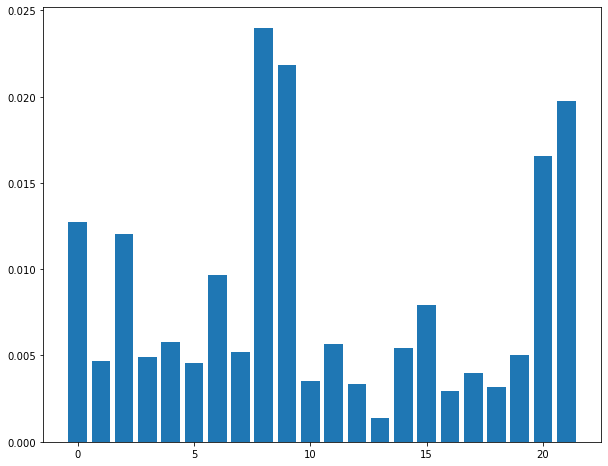

In [930]:
# perform permutation importance
results2 = permutation_importance(final_model_knn2, X_train, y_train, scoring='accuracy')
# get importance
importance2 = results2.importances_mean
# summarize feature importance
for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,8))
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()



roc_auc_score:  0.8920316140716869


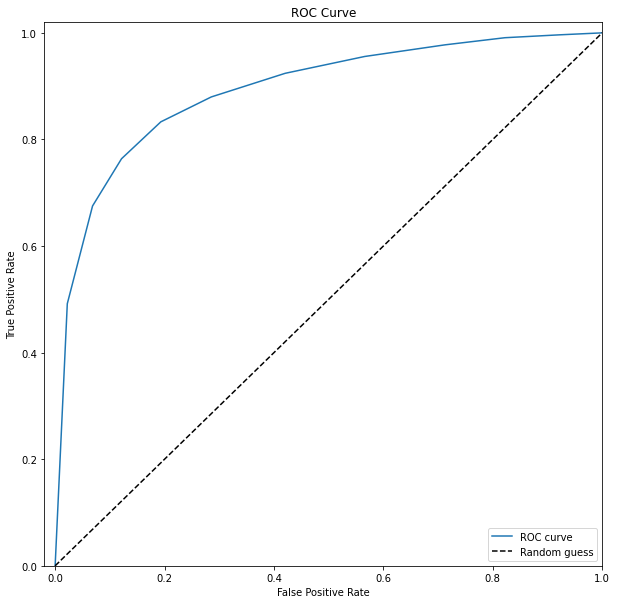

In [931]:
y_pred_knn_proba = final_model_knn2.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn_proba)

plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

print('roc_auc_score: ', roc_auc_score(y_test, y_pred_knn_proba))

# 3. Random Forest Model 2

In [886]:
# Hyperparameter tuning using RandomizedSearchCV

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf2 = RandomForestClassifier()

rf_random2 = RandomizedSearchCV(estimator = rf2,param_distributions = random_grid,
               n_iter = 100, cv = 10, verbose=2, random_state=35, n_jobs = -1)
#GridSearchCV(classifier2, param_grid = param_grid2, cv=10, verbose=True, n_jobs=-1)
rf_random2.fit(X_train, y_train)

rf_random2.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

In [932]:
randmf2 = RandomForestClassifier(n_estimators = 50, min_samples_split = 2, min_samples_leaf= 4, max_features = 'auto', max_depth= 90, bootstrap=False) 
randmf2.fit( X_train, y_train) 

#prediction for train data
y_train_predict_rf = randmf2.predict(X_train)

#prediction for test data
y_pred_rf = randmf2.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
accuracy_score(y_test, y_pred_rf)

[[ 390  195]
 [ 155 1492]]


0.8431899641577061

In [933]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)



[[ 390  195]
 [ 155 1492]]


<AxesSubplot:>

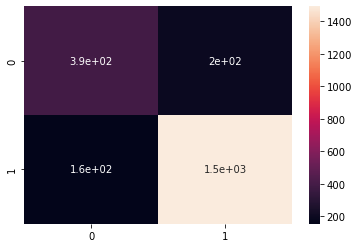

In [934]:
sns.heatmap(cm_rf, annot = True)

In [935]:
#Test score

print(classification_report(y_test, y_pred_rf))

# Train score

print(classification_report(y_train, y_train_predict_rf ))



              precision    recall  f1-score   support

           0       0.72      0.67      0.69       585
           1       0.88      0.91      0.90      1647

    accuracy                           0.84      2232
   macro avg       0.80      0.79      0.79      2232
weighted avg       0.84      0.84      0.84      2232

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1731
           1       0.99      1.00      0.99      4963

    accuracy                           0.99      6694
   macro avg       0.99      0.99      0.99      6694
weighted avg       0.99      0.99      0.99      6694



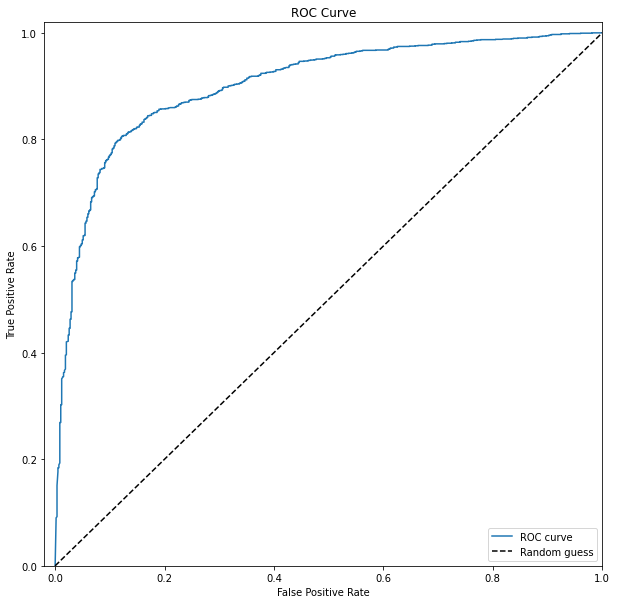

In [896]:
y_pred_rf_proba = randmf2.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)

plt.subplots(1, figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")




In [936]:
print('roc_auc_score: ', roc_auc_score(y_test, y_pred_rf_proba))


roc_auc_score:  0.902100166581041


Text(0, 0.5, 'Features')

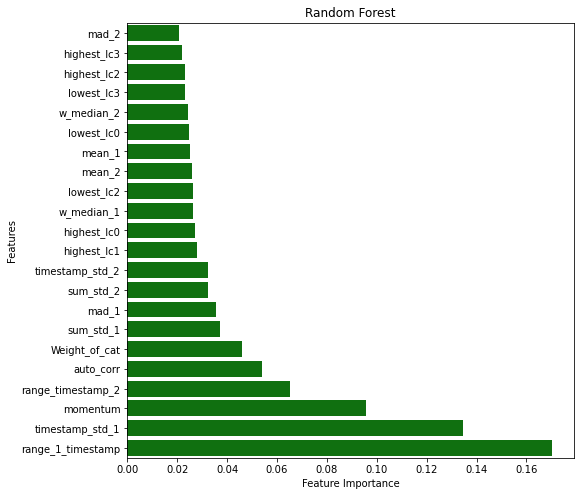

In [1009]:
# plot feature importance

feature_importance = np.array(randmf2.feature_importances_)
feature_names = np.array(chosen_features)

data={'feature_names':feature_names,'feature_importance':feature_importance}
feature_df = pd.DataFrame(data)

feature_df.sort_values(by=['feature_importance'],inplace=True)
plt.figure(figsize=(8,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'], color='g')
plt.title('Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

# 4. Decision Tree Model 2

In [938]:
# Hyperparameter tunning for decision tree

dt_params2= {'max_depth':np.arange(3,15,1),
            'min_samples_leaf':randint(1,50),
            'criterion': ['gini', 'entropy', 'log_loss']
            }
# Decision tree classifier
tree2 = DecisionTreeClassifier()

# RandomizedSearchCV object: tree_cv2
tree_cv2 = RandomizedSearchCV(tree, dt_params2, cv=10)

# Fit to the data
tree_cv2.fit(X_train, y_train)

# print tuned parameters
tree_cv2.best_params_

{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 33}

In [940]:
#best model for decision tree
final_model_tree2 = DecisionTreeClassifier(criterion= 'gini', max_depth= 14, min_samples_leaf= 33, random_state=0)
final_model_tree2.fit(X_train, y_train)

#prediction for train data
y_train_predict_tree = final_model_tree2.predict(X_train)

#prediction for test data
y_pred_tree = final_model_tree2.predict(X_test)

# Test score

cm_tree = confusion_matrix(y_test, y_pred_tree)
print(cm_tree)
accuracy_score(y_test, y_pred_tree)



[[ 358  227]
 [ 212 1435]]


0.8033154121863799

<AxesSubplot:>

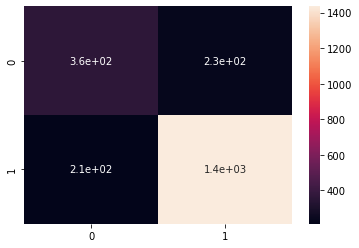

In [941]:
sns.heatmap(cm_tree, annot = True)

In [942]:
#Test report

print(classification_report(y_test, y_pred_tree))

#Train report

print(classification_report(y_train,y_train_predict_tree))


              precision    recall  f1-score   support

           0       0.63      0.61      0.62       585
           1       0.86      0.87      0.87      1647

    accuracy                           0.80      2232
   macro avg       0.75      0.74      0.74      2232
weighted avg       0.80      0.80      0.80      2232

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1731
           1       0.90      0.92      0.91      4963

    accuracy                           0.86      6694
   macro avg       0.82      0.81      0.82      6694
weighted avg       0.86      0.86      0.86      6694



Text(0, 0.5, 'Features')

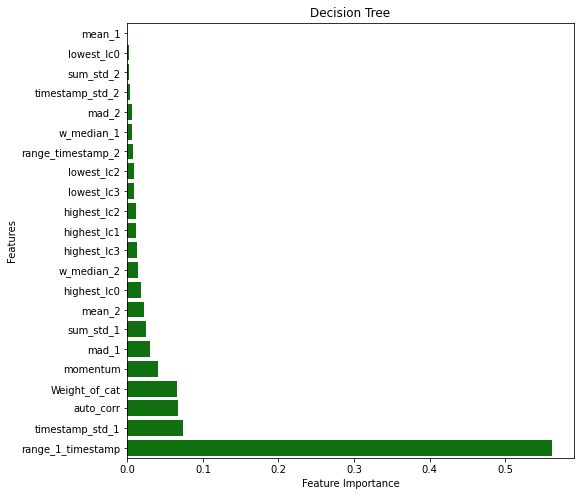

In [1010]:
# plot feature importance

feature_importance = np.array(final_model_tree2.feature_importances_)
feature_names = np.array(chosen_features)

data={'feature_names':feature_names,'feature_importance':feature_importance}
feature_df = pd.DataFrame(data)

feature_df.sort_values(by=['feature_importance'],inplace=True)
plt.figure(figsize=(8,8))
sns.barplot(x=feature_df['feature_importance'], y=feature_df['feature_names'], color='g')
plt.title('Decision Tree')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

roc_auc_score:  0.8452228605234069


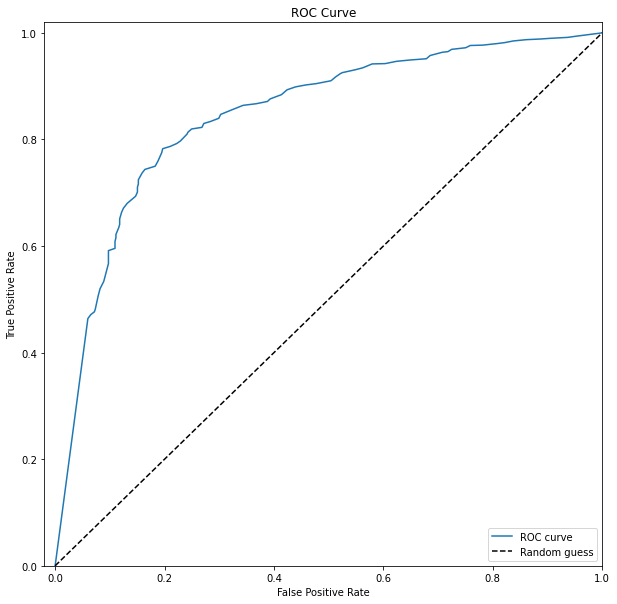

In [945]:
y_pred_tree_proba = final_model_tree2.predict_proba(X_test)[::,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree_proba)

plt.subplots(1, figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

print('roc_auc_score: ', roc_auc_score(y_test, y_pred_tree_proba))